# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 26.09.2021

Мягкий дедлайн: 23:59MSK 11.10.2021

Жесткий дедлайн: 23:59MSK 14.10.2021

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
#!pip install folium

In [ ]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [ ]:
df = pd.read_csv('train.csv')
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [ ]:
df = df.drop(columns=['dropoff_datetime'], errors='ignore')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
display(df.dtypes)
df.head()

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0                  N            455  
1                  N            663  
2                  N           2124  
3                  N            429  
4                  N            435

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

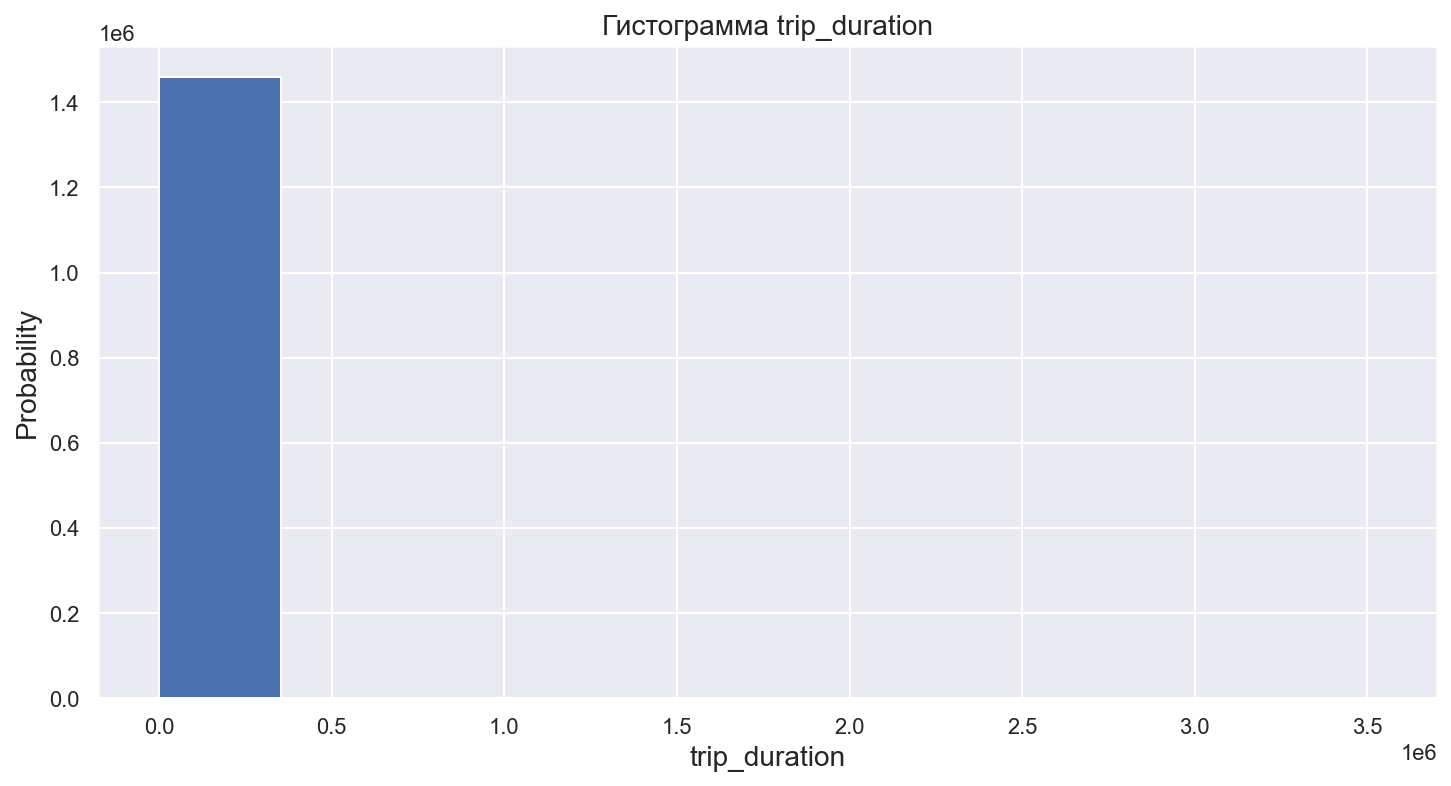

In [ ]:
%config InlineBackend.figure_format = 'retina'
df.hist(column='trip_duration', figsize=(12, 6))
plt.xlabel('trip_duration', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Гистограмма trip_duration', fontsize=14)
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: видимо, имеются выбросы

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: целевая переменная (длительность поездки) неотрицательна, и, как видно из гистограммы, имеются выбросы.
RMSLE менее чувствительна к выбросам, чем, например, RMSE и штрафует скорее за отклонение в порядке величин. Плюс RMSLE
штрафует сильнее заниженные прогнозы, чем завышенные, что может быть важно с точки зрения предметной области

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: подставим $a(x_i) = \exp(\hat{a}(x_i)) - 1$ и $\hat{y}_i = \log{(y_i + 1)}$ в выражение для RMSLE(X,y,a), получим   $\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i))^2}$,а это есть RMSE,оптимизация которой эквивалентна оптимизации MSE (обсуждалось на семинаре (это монотонное преобразование))

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

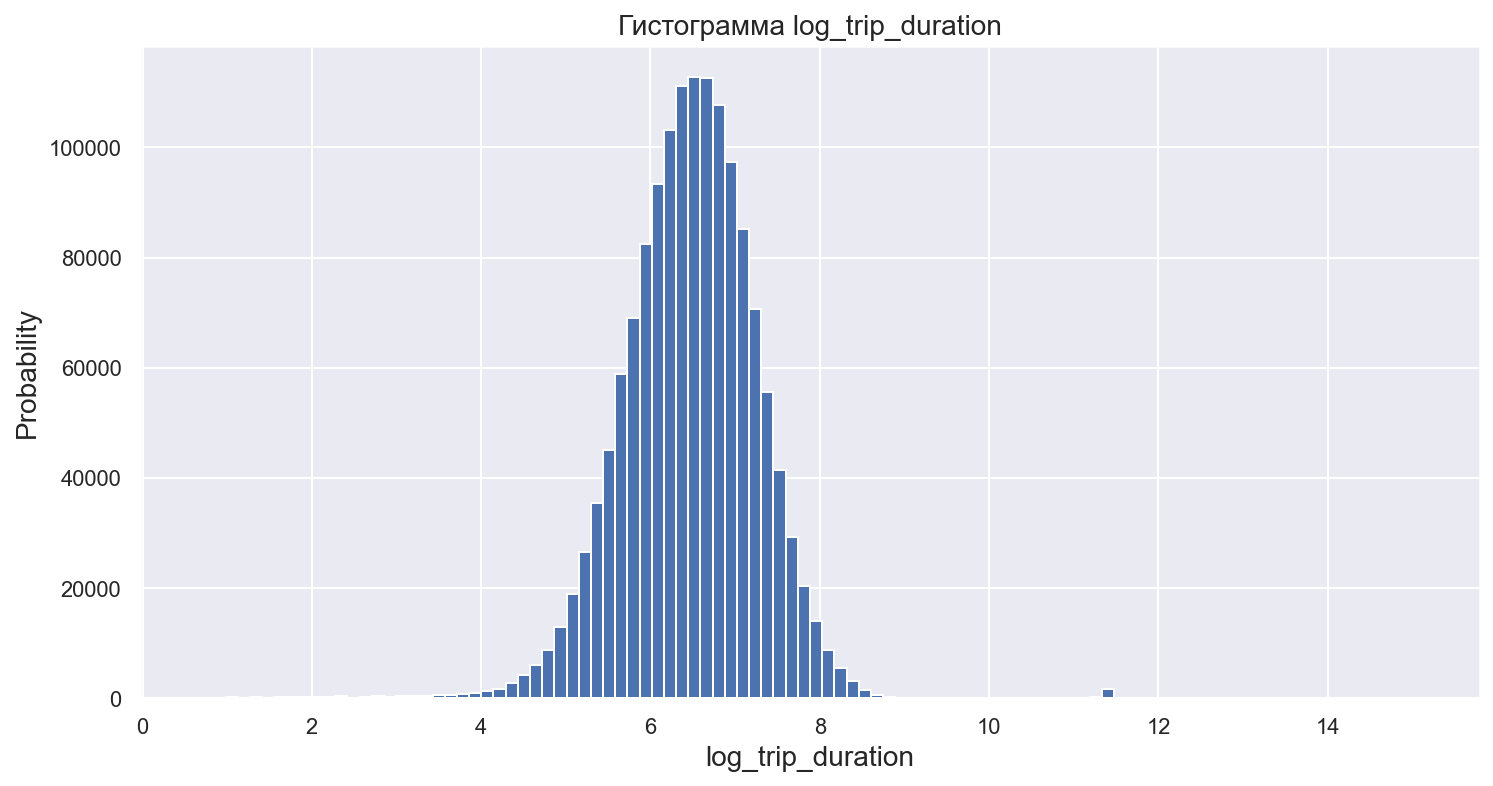

In [ ]:
df['log_trip_duration'] = df['trip_duration'].apply(lambda x: np.log1p(x))

df.hist(column='log_trip_duration', figsize=(12, 6), bins=100)
plt.xlabel('log_trip_duration', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Гистограмма log_trip_duration', fontsize=14)
plt.show()
df = df.drop(columns='trip_duration', errors='ignore')

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [ ]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(df['log_trip_duration'].mean() * np.ones(df.shape[0]), df['log_trip_duration']))

0.7957592365411504

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [ ]:
df['date'] = df['pickup_datetime'].apply(lambda x: x.date())

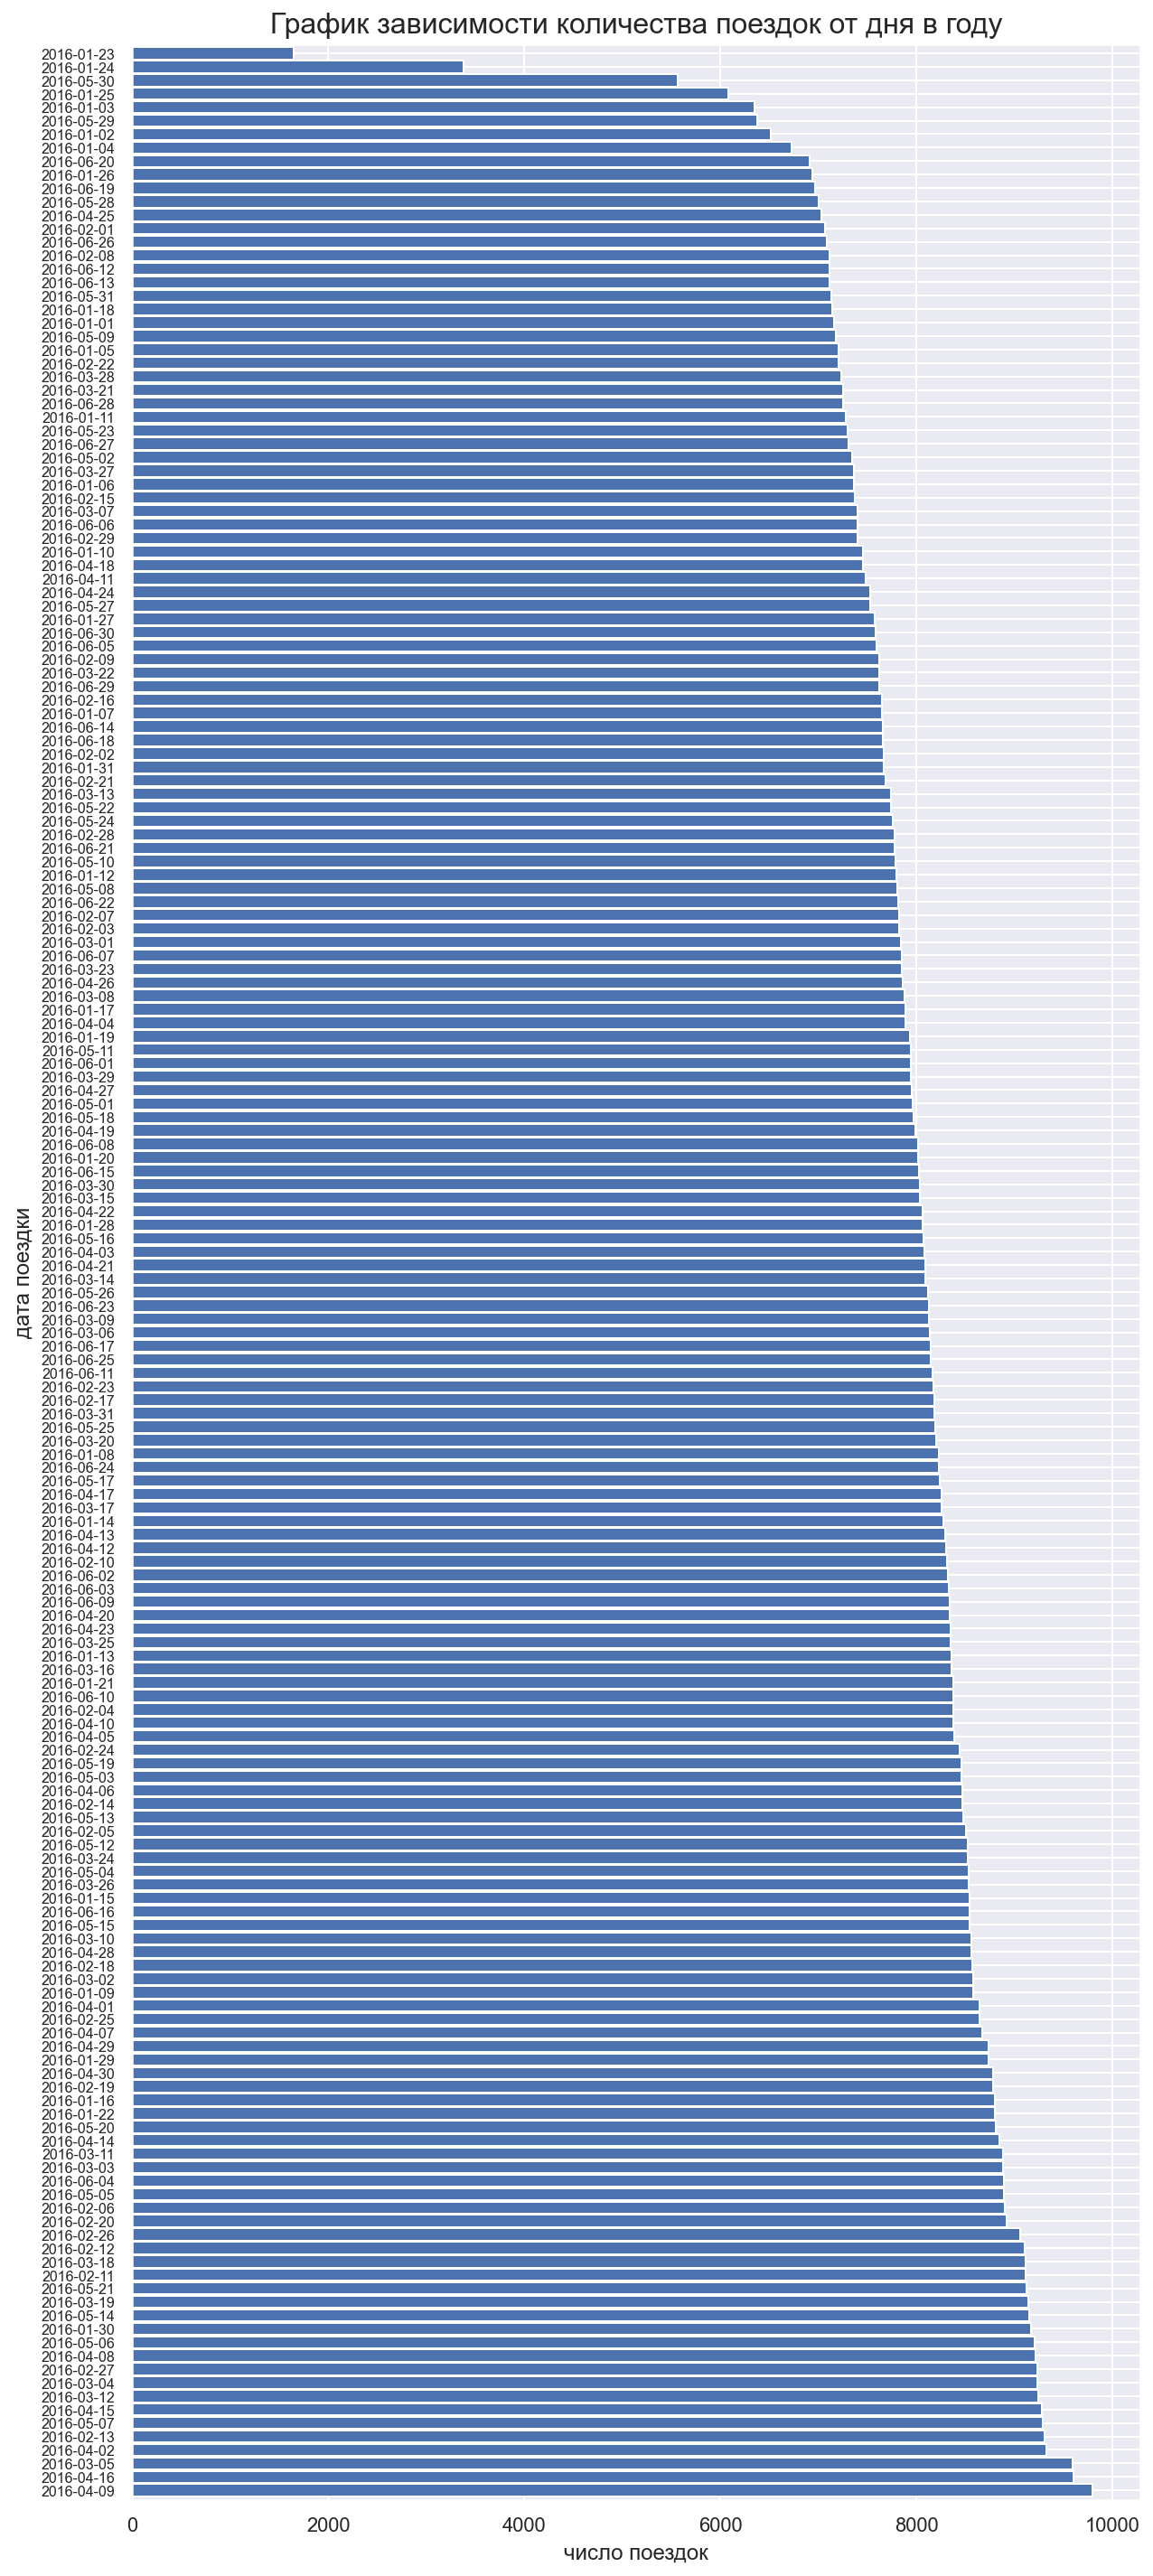

In [ ]:
%config InlineBackend.figure_format = 'retina'
fig = plt.figure(figsize=(10, 25))
plt.title('График зависимости количества поездок от дня в году', fontsize=16)
plt.ylabel('дата поездки', fontsize=12)
plt.xlabel('число поездок', fontsize=12)
ax = df['date'].value_counts(sort=True, ascending=False).plot(kind='barh', width=0.9)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

**Ответ:** снежная буря "Джонас", из-за которой было запрещено автомобильное движение 23 и 24 января. И 30 мая: День Поминовинения (Memorial Day) - в этот день, видимо, остаются дома с семьей

In [ ]:
df['date'].value_counts(sort=True, ascending=True).iloc[:3]

2016-01-23    1648
2016-01-24    3383
2016-05-30    5570
Name: date, dtype: int64

In [ ]:
df['hour'] = df['pickup_datetime'].apply(lambda x: x.time().hour)
df['weekday'] = df['pickup_datetime'].apply(lambda x: x.strftime('%A'))
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration        date  \
0               40.765602                  N           6.122493  2016-03-14   
1               40.731152                  N           6.498282  2016-06-12   
2               40.710087                  N           7.661527  2016-01-19   
3               40.706718                  N           6.063785  2016-04-06   
4               40.782520                  N           6.077642  2016-03-26   
...                   ...                ...                ...         ...   
1458639         40.740170                  N           6.658011  2016-04-08   
1458640         40.796547                  N           6.486161  2016-01-10   
1458641         40.707371                  N           6.639876  2016-04-22   
1458642         40.757107                  N           5.924256  2016-01-05   
1458643         40.790585                  N           5.293305  2016-04-05   

         hour    weekday  
0          17     Monday  
1           0     Sunday  
2          11    Tuesday  
3          19  Wednesday  
4          13   Saturday  
...       ...        ...  
1458639    13     Friday  
1458640     7     Sunday  
1458641     6     Friday  
1458642    15    Tuesday  
1458643    14    Tuesday  

[1458644 rows x 13 columns]

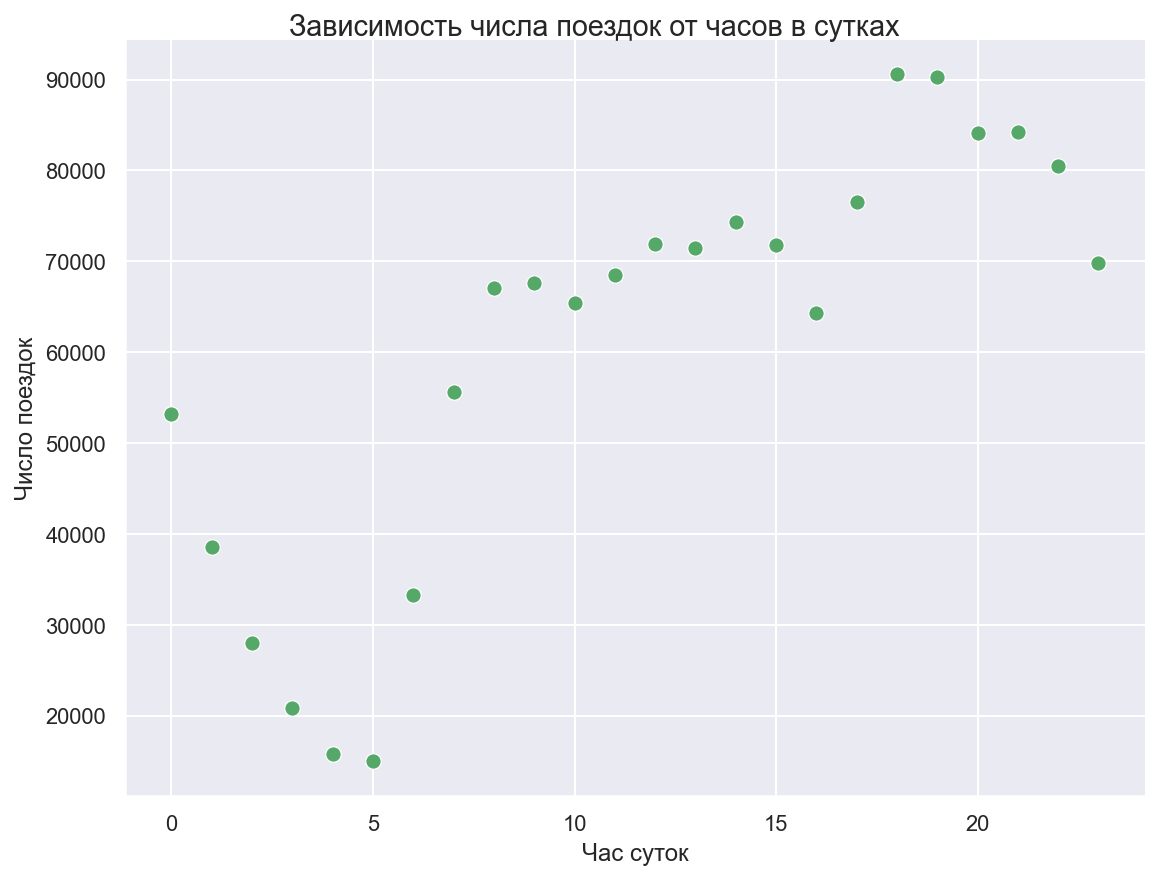

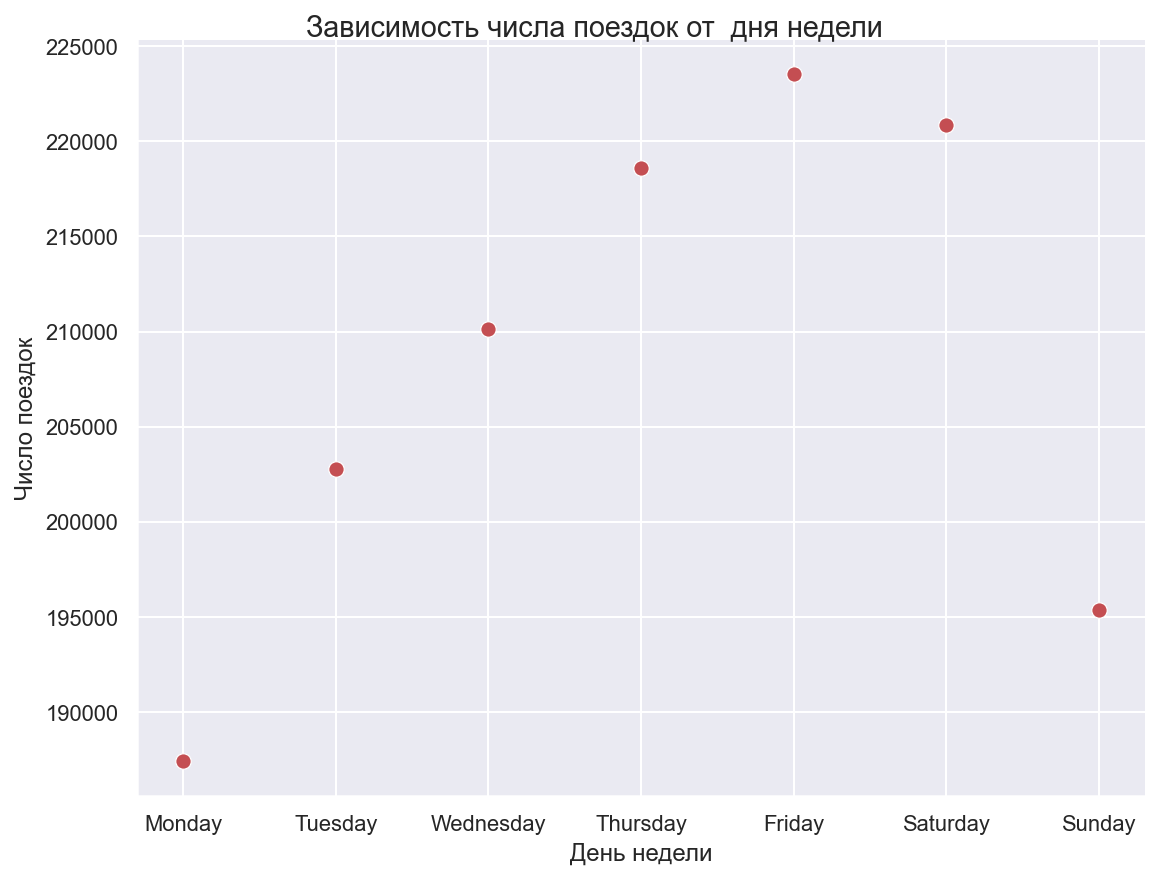

In [ ]:
%config InlineBackend.figure_format = 'retina'
hour = df['hour'].value_counts().sort_index()
weekday = df['weekday'].value_counts().reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

ax = sns.relplot(x=hour.index, y=hour.values, kind='scatter', color='g', height=6, aspect=8/6, s=60)
ax.set_axis_labels('Час суток', 'Число поездок')
ax.fig.suptitle('Зависимость числа поездок от часов в сутках')
plt.subplots_adjust(top=0.95)

ax1 = sns.relplot(x=weekday.index, y=weekday.values, kind='scatter', color='r', height=6, aspect=8/6, s=60)
ax1.set_axis_labels('День недели', 'Число поездок')
ax1.fig.suptitle('Зависимость числа поездок от  дня недели')
plt.subplots_adjust(top=0.95)
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [ ]:
df['month'] = df['pickup_datetime'].apply(lambda x: x.strftime('%B'))

In [ ]:
kek = df.groupby(['hour', 'month']).count()[['id']].rename(columns={'id': 'amount'}).reset_index()
kek1 = df.groupby(['hour', 'weekday']).count()[['id']].rename(columns={'id': 'amount'}).reset_index()

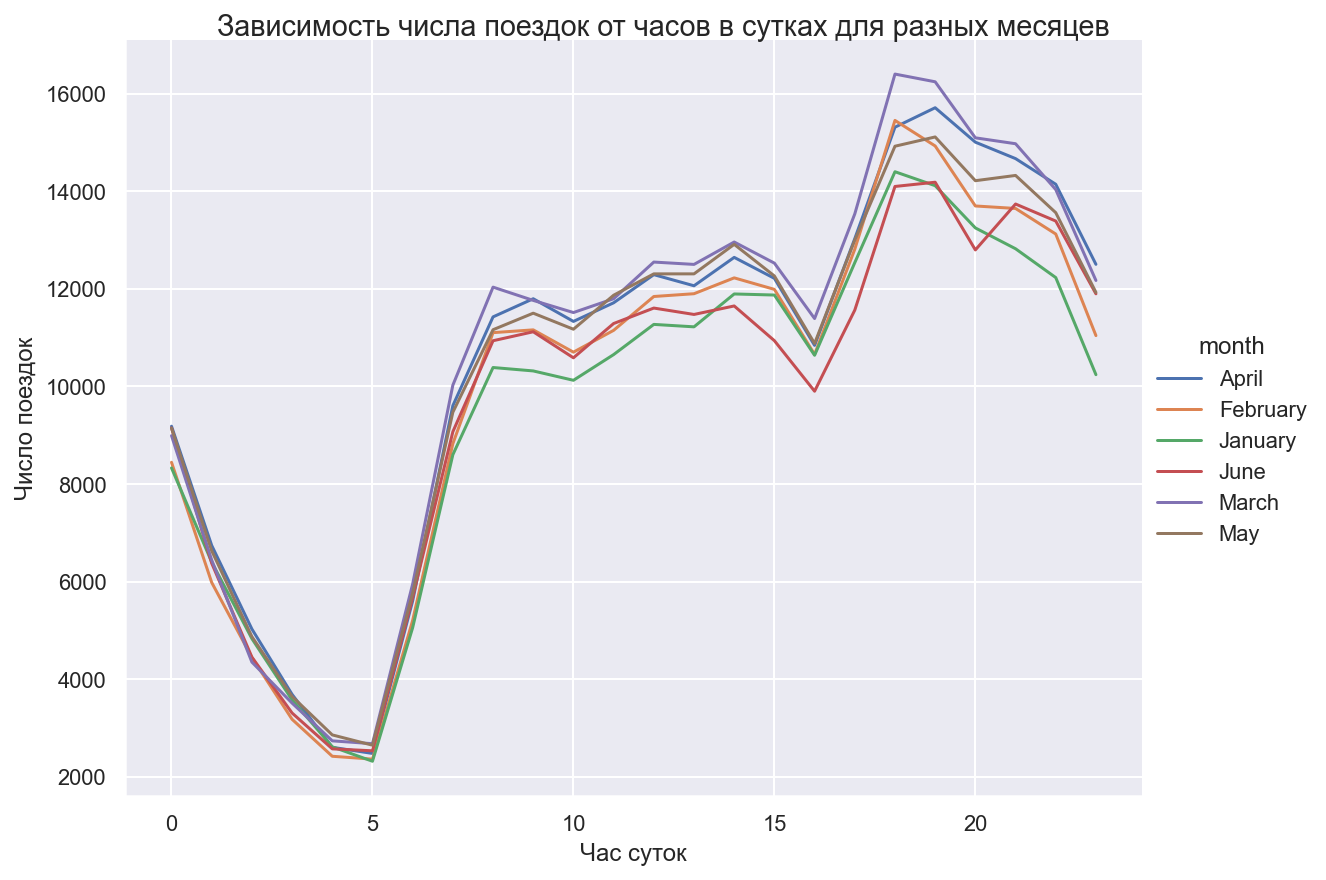

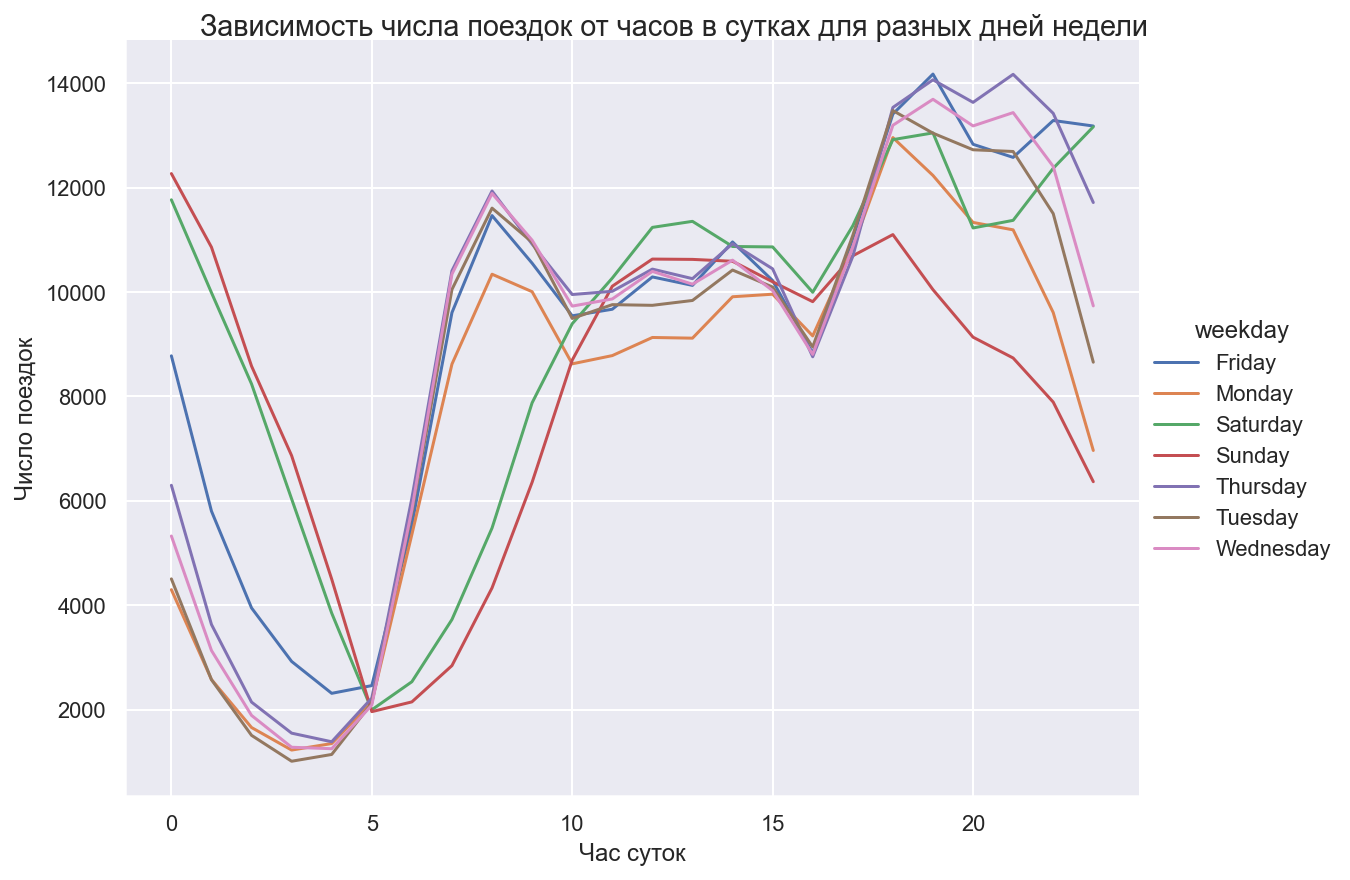

In [ ]:
ax = sns.relplot(data=kek, x='hour', y='amount', hue='month', kind='line', height=6, aspect=8/6)
ax.set_axis_labels('Час суток', 'Число поездок')
ax.fig.suptitle('Зависимость числа поездок от часов в сутках для разных месяцев')
plt.subplots_adjust(top=0.95)

ax1 = sns.relplot(data=kek1, x='hour', y='amount', hue='weekday', kind='line', height=6, aspect=8/6)
ax1.set_axis_labels('Час суток', 'Число поездок')
ax1.fig.suptitle('Зависимость числа поездок от часов в сутках для разных дней недели')
plt.subplots_adjust(top=0.95)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ:** в выходные дни число поездок в промежуток с 0 часов до примерно 5 чуть выше, чем в будние дни, что возможно связано с тем,что начиная с вечера пятницы люди отдыхают, значит чаще заказывают такси в вечернее-ночное время. Графики для выходных дней в принципе идут как бы с отставанием (лагом),например, первый пик приходится в субботу-воскресенье на примерно 12-13 часов дня,так как в эти дни люди просыпаются обычно позже,чем в будни. В остальном оба графика вполне следуют обычной логике: в промежутке 0-5 часов активности нет,и число поездок убывает,затем в 9 часов начинается рабочий день,и число поездок достигает первого пика, затем остается примерно постоянным в течение рабочего дня и следующий пик достигается в конце рабочего дня в 18-19 часов.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [ ]:
from sklearn.model_selection import train_test_split
y = df['log_trip_duration']
X = df.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

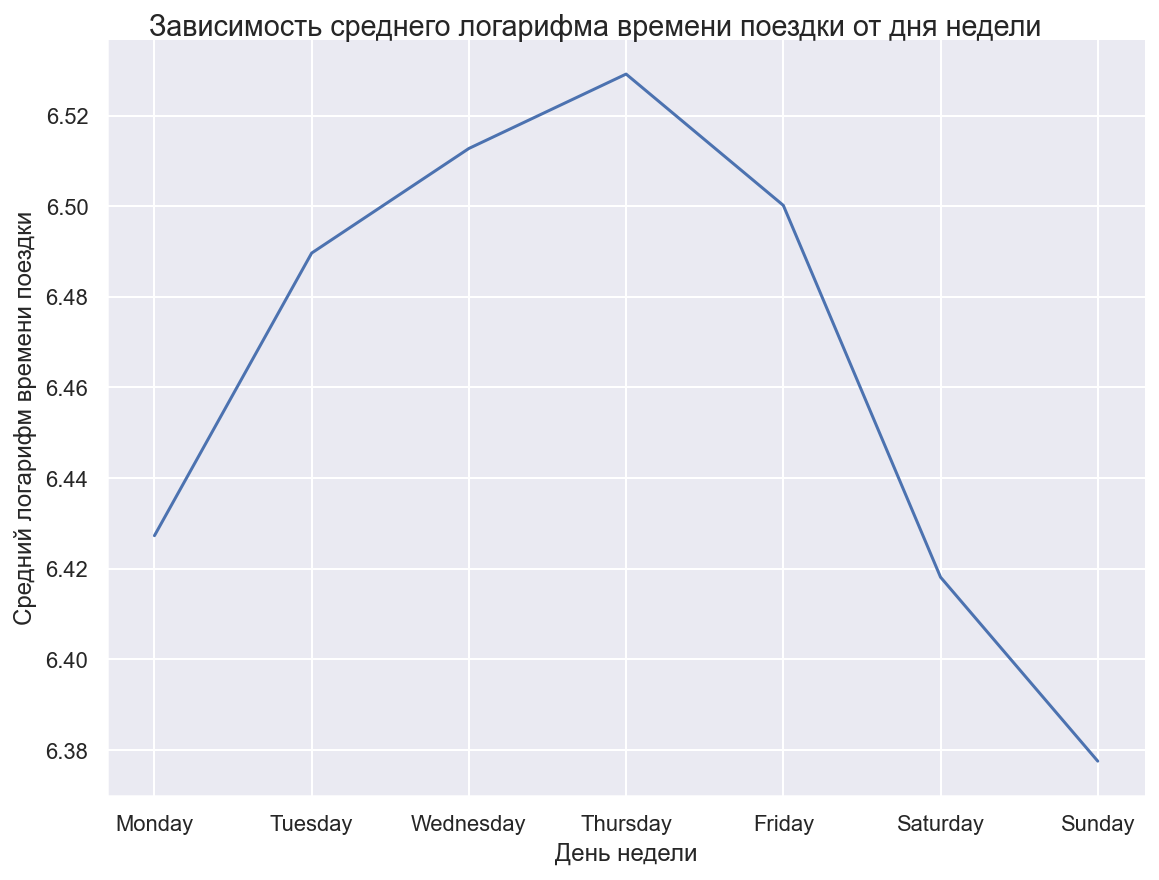

In [ ]:
kek = df.loc[X_train.index].groupby('weekday').mean()[['log_trip_duration']].reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
ax = sns.relplot(data=kek, x='weekday', y='log_trip_duration',  kind='line', height=6, aspect=8/6)
ax.set_axis_labels('День недели', 'Средний логарифм времени поездки')
ax.fig.suptitle('Зависимость среднего логарифма времени поездки от дня недели')
plt.subplots_adjust(top=0.95)
plt.show()

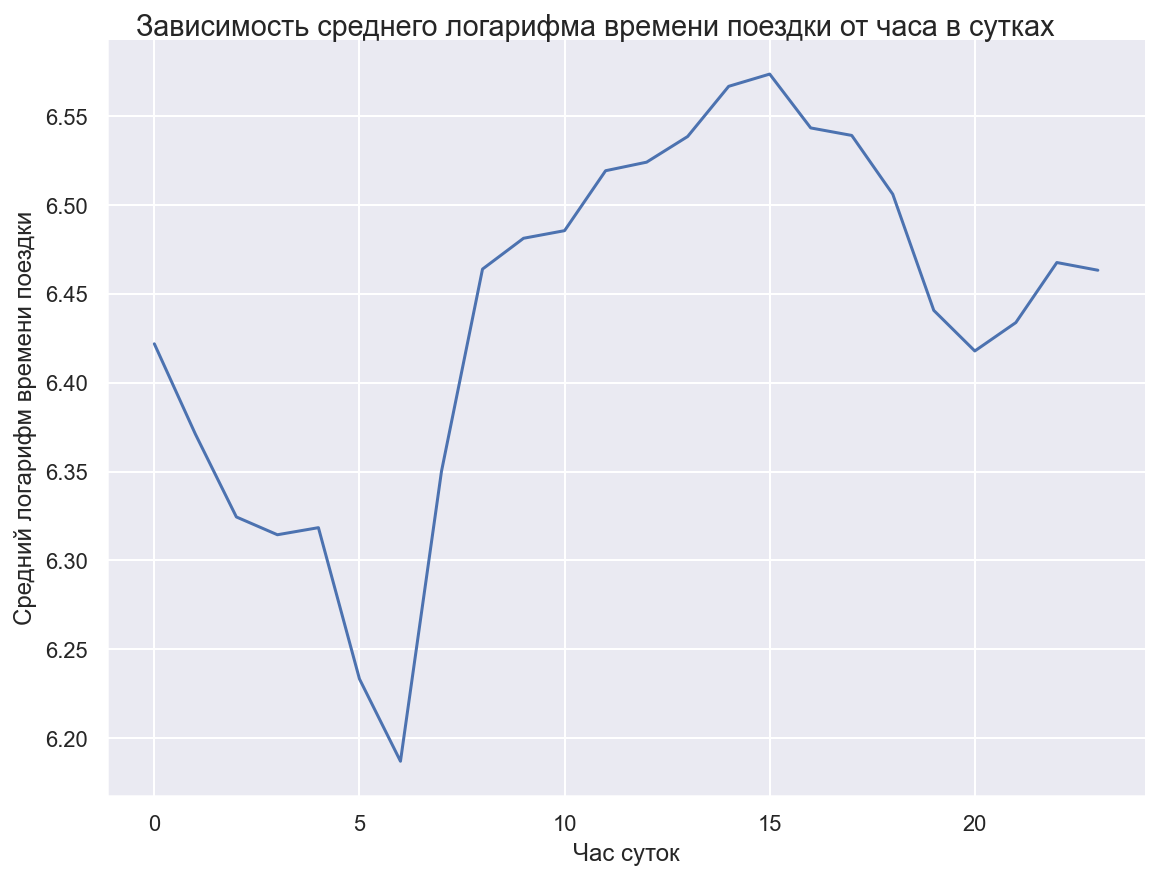

In [ ]:
kek = df.loc[X_train.index].groupby('hour').mean()[['log_trip_duration']]
ax = sns.relplot(data=kek, x='hour', y='log_trip_duration',  kind='line', height=6, aspect=8/6)
ax.set_axis_labels('Час суток', 'Средний логарифм времени поездки')
ax.fig.suptitle('Зависимость среднего логарифма времени поездки от часа в сутках')
plt.subplots_adjust(top=0.95)
plt.show()

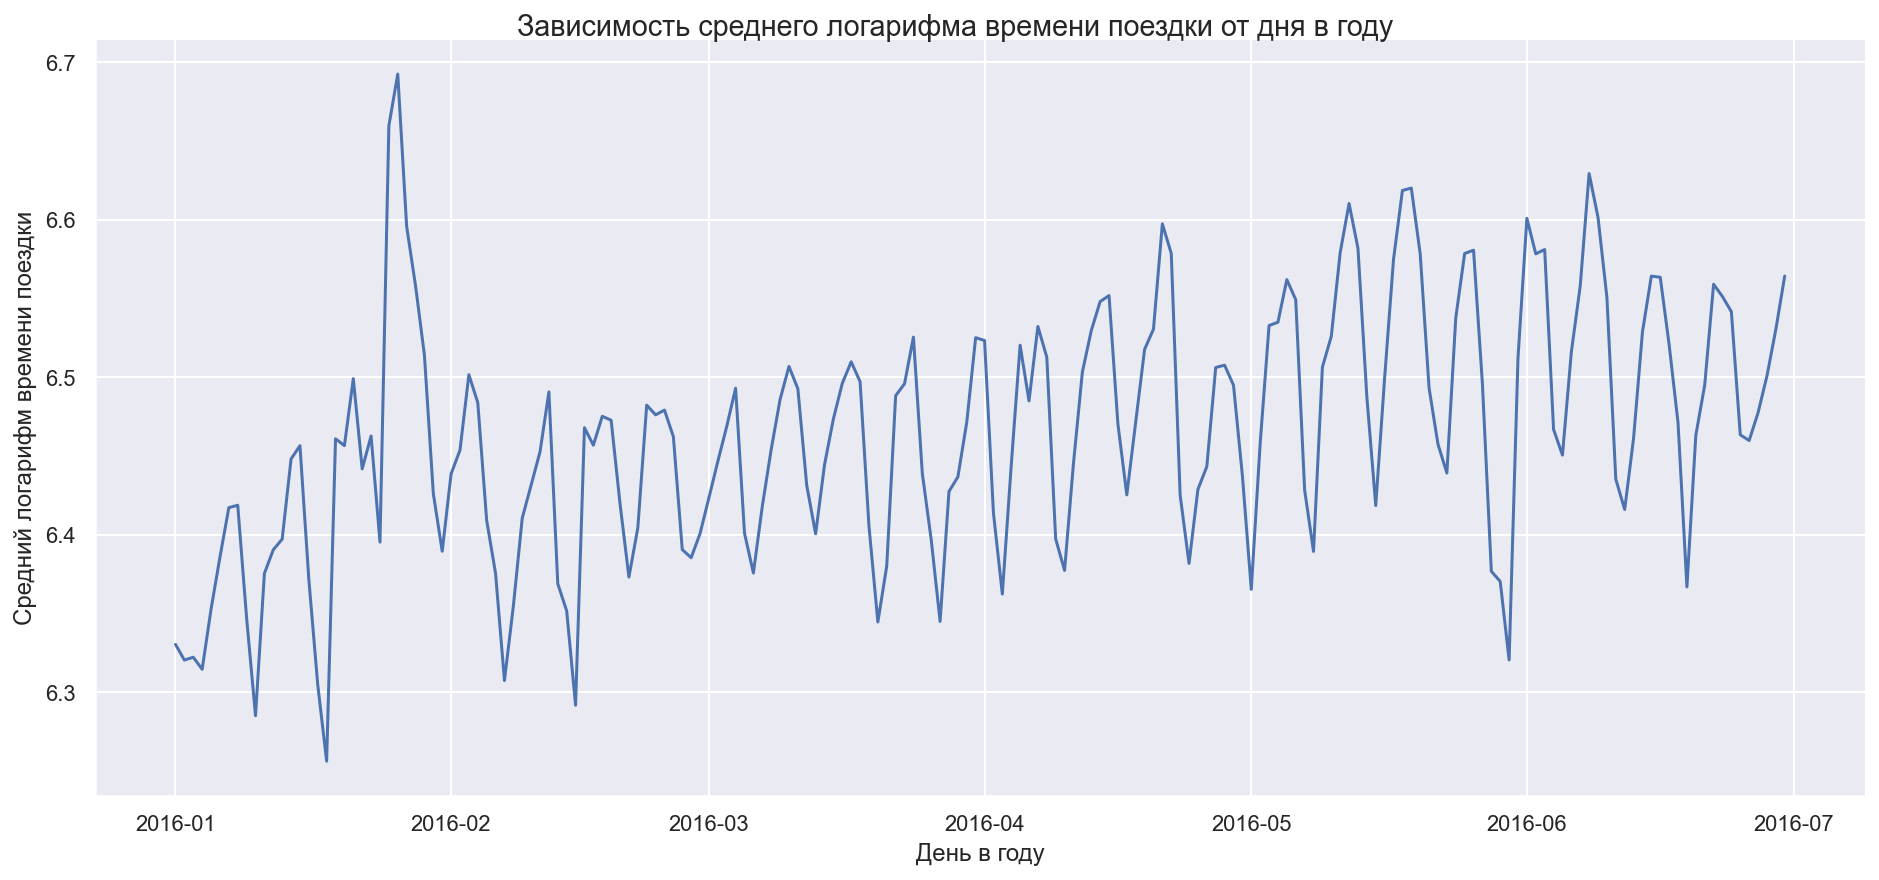

In [ ]:
kek = df.loc[X_train.index].groupby('date').mean()[['log_trip_duration']]
ax = sns.relplot(data=kek, x='date', y='log_trip_duration',  kind='line', height=6, aspect=13/6)
ax.set_axis_labels('День в году', 'Средний логарифм времени поездки')
ax.fig.suptitle('Зависимость среднего логарифма времени поездки от дня в году')
plt.subplots_adjust(top=0.95)
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ:** Да,графики зависимости таргета от дня недели и от часа в сутках похожи на аналогичные графики для количества поездок. Потому что **есть корреляция?** В аномальный период 24-25 января проиходит резкий скачок среднего таргета до 6.7 (зазумил с помощью слайсинга), видимо,из-за того, что число поездок снизилось,и из-за метели они стали гораздо длительнее. А 30 мая, наоборот, таргет падает до примерно 6.32, что возможно связано с тем, что дороги в этот день свободнее. Наблюдается восходящий линейный тренд

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

День недели, месяц, час добавил ранее (столбцы 'weekday','month','hour',соответственно)

In [ ]:
import datetime as dt
X_train = X_train.copy() #чтобы не получать warning
X_test = X_test.copy()

df['anom_jan'] = df['date'].apply(lambda x: 1 if x == dt.date(2016,1,23) or x == dt.date(2016,1,24) else 0)
df['anom_may'] = df['date'].apply(lambda x: 1 if x == dt.date(2016,5,30) else 0)
df['daynumber'] = df['pickup_datetime'].apply(lambda x: x.timetuple().tm_yday)

X_train['anom_jan'] = X_train['date'].apply(lambda x: 1 if x == dt.date(2016,1,23) or x == dt.date(2016,1,24) else 0)
X_train['anom_may'] = X_train['date'].apply(lambda x: 1 if x == dt.date(2016,5,30) else 0)
X_train['daynumber'] = X_train['pickup_datetime'].apply(lambda x: x.timetuple().tm_yday)

X_test['anom_jan'] = X_test['date'].apply(lambda x: 1 if x == dt.date(2016,1,23) or x == dt.date(2016,1,24) else 0)
X_test['anom_may'] = X_test['date'].apply(lambda x: 1 if x == dt.date(2016,5,30) else 0)
X_test['daynumber'] = X_test['pickup_datetime'].apply(lambda x: x.timetuple().tm_yday)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ:** бинарные: anom_jan, anom_may (для аномальных периодов); как категориальные стоит рассматривать признаки weekday, month, поскольку бессмысленно сравнивать понедельник с четвергом или февраль с июнем (невозможно упорядочить и сказать,что больше); час в сутках и день в году рекомендуется рассматривать как численную переменную, например, здесь:  <br> https://www.pluralsight.com/guides/machine-learning-for-time-series-data-in-python   <br>https://qastack.ru/datascience/17759/encoding-features-like-month-and-hour-as-categorial-or-numeric <br>
  https://ru.stackoverflow.com/questions/1168152/Время-как-признак-в-ml <br> причем рекомендуется использовать sin, cos для часов (чтобы приблизить 23 часа к 0 часов и тд.), видимо,логично поступить так же для номера дней в году:https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

Используем только уже имеющиеся признаки

In [ ]:
categorical = ['weekday', 'month', 'anom_jan', 'anom_may']
numeric_features = ['hour', 'daynumber']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7911


Теперь попробуем использовать признаки с синусами/косинусами

In [ ]:
X_train['sin_hour'] = np.sin(2 * np.pi * df.hour / 24)
X_train['cos_hour'] = np.cos(2 * np.pi * df.hour / 24)
X_train['sin_daynumber'] = np.sin(2 * np.pi * df.daynumber / 365)
X_train['cos_daynumber'] = np.cos(2 * np.pi * df.daynumber / 365)

X_test['sin_hour'] = np.sin(2 * np.pi * df.hour / 24)
X_test['cos_hour'] = np.cos(2 * np.pi * df.hour / 24)
X_test['sin_daynumber'] = np.sin(2 * np.pi * df.daynumber / 365)
X_test['cos_daynumber'] = np.cos(2 * np.pi * df.daynumber / 365)

In [ ]:
numeric_features1 = ['hour', 'daynumber', 'sin_hour', 'cos_hour',
       'sin_daynumber', 'cos_daynumber']

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features1)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7887


с синусами/косинусами rmse снизился, но в задании об этом ничего не сказано,поэтому выкину эти признаки

In [ ]:
X_train.drop(columns=['sin_hour', 'cos_daynumber', 'cos_hour', 'sin_daynumber', 'cos_daynumber'], inplace=True, errors='ignore')
X_test.drop(columns=['sin_hour', 'cos_daynumber', 'cos_hour', 'sin_daynumber', 'cos_daynumber'], inplace=True, errors='ignore')

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)
    m.add_child(folium.LatLngPopup())

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [ ]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

**Ответ:** на первой карте (координаты начала поездки) выделяются точки на юго-востоке (возле Queens и John F. Kennedy International Aiprpoty).
На второй карте (с координатами конца поездки) выделяются точки в Elizabeth (Newark International Airport) и,опять же,точки возле аэропорта Кеннеди. В основном выделяющиеся точки лежат рядом с аэропортами (обсуждалось на семинаре)

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [ ]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df.loc[:, 'haversine'] = haversine_array(df['pickup_latitude'].values, df['pickup_longitude'].values, df['dropoff_latitude'].values, df['dropoff_longitude'].values)

In [ ]:
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration        date  \
0               40.765602                  N           6.122493  2016-03-14   
1               40.731152                  N           6.498282  2016-06-12   
2               40.710087                  N           7.661527  2016-01-19   
3               40.706718                  N           6.063785  2016-04-06   
4               40.782520                  N           6.077642  2016-03-26   
...                   ...                ...                ...         ...   
1458639         40.740170                  N           6.658011  2016-04-08   
1458640         40.796547                  N           6.486161  2016-01-10   
1458641         40.707371                  N           6.639876  2016-04-22   
1458642         40.757107                  N           5.924256  2016-01-05   
1458643         40.790585                  N           5.293305  2016-04-05   

         hour    weekday    month  anom_jan  anom_may  daynumber  haversine  
0          17     Monday    March         0         0         74   1.498521  
1           0     Sunday     June         0         0        164   1.805507  
2          11    Tuesday  January         0         0         19   6.385098  
3          19  Wednesday    April         0         0         97   1.485498  
4          13   Saturday    March         0         0         86   1.188588  
...       ...        ...      ...       ...       ...        ...        ...  
1458639    13     Friday    April         0         0         99   1.225080  
1458640     7     Sunday  January         0         0         10   6.049836  
1458641     6     Friday    April         0         0        113   7.824606  
1458642    15    Tuesday  January         0         0          5   1.092564  
1458643    14    Tuesday    April         0         0         96   1.134042  

[1458644 rows x 18 columns]

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [ ]:
df['log_haversine'] = np.log1p(df['haversine'].values)

Отметим, что в выборке присутствует довольно большое число поездок с нулевым расстоянием (координаты старта для них совпадают с координатами конца), поэтому для них логарифм haversine равен -inf. В задании ничего не сказано по этому поводу,поэтому я решил, что стоит опять использовать np.log1p (выкидывать их все точно не имеет смысла,поскольку они составляют довольно значительную часть выборки, кроме того, если будут значения -inf, то sklearn не даст построить регрессию с этим признаком)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [ ]:
corrmat = df[['log_haversine', 'haversine', 'log_trip_duration']].corr()
display(corrmat)

if corrmat['log_haversine']['log_trip_duration'] > corrmat['haversine']['log_trip_duration']:
    print('Логарифм расстояния лучше коррелирует с таргетом')

log_haversine  haversine  log_trip_duration
log_haversine           1.000000   0.844501           0.749882
haversine               0.844501   1.000000           0.573595
log_trip_duration       0.749882   0.573595           1.000000

Логарифм расстояния лучше коррелирует с таргетом


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

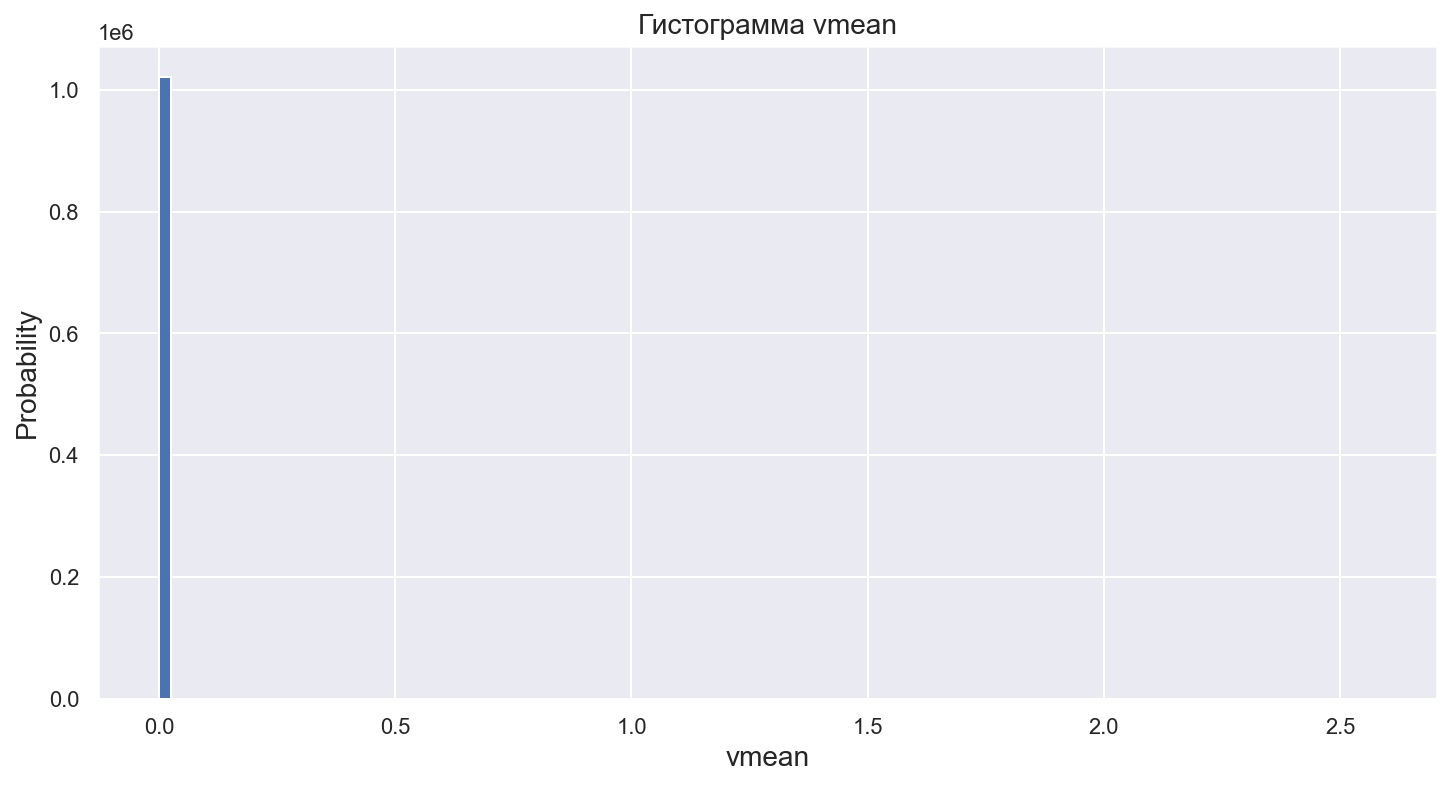

In [ ]:
%config InlineBackend.figure_format = 'retina'
X_train.loc[:, 'haversine'] = haversine_array(X_train['pickup_latitude'].values, X_train['pickup_longitude'].values, X_train['dropoff_latitude'].values, X_train['dropoff_longitude'].values)
X_train.loc[:, 'vmean'] = X_train['haversine'] / np.expm1(y_train)

X_train.hist(column='vmean', figsize=(12, 6), bins=100)
plt.xlabel('vmean', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Гистограмма vmean', fontsize=14)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

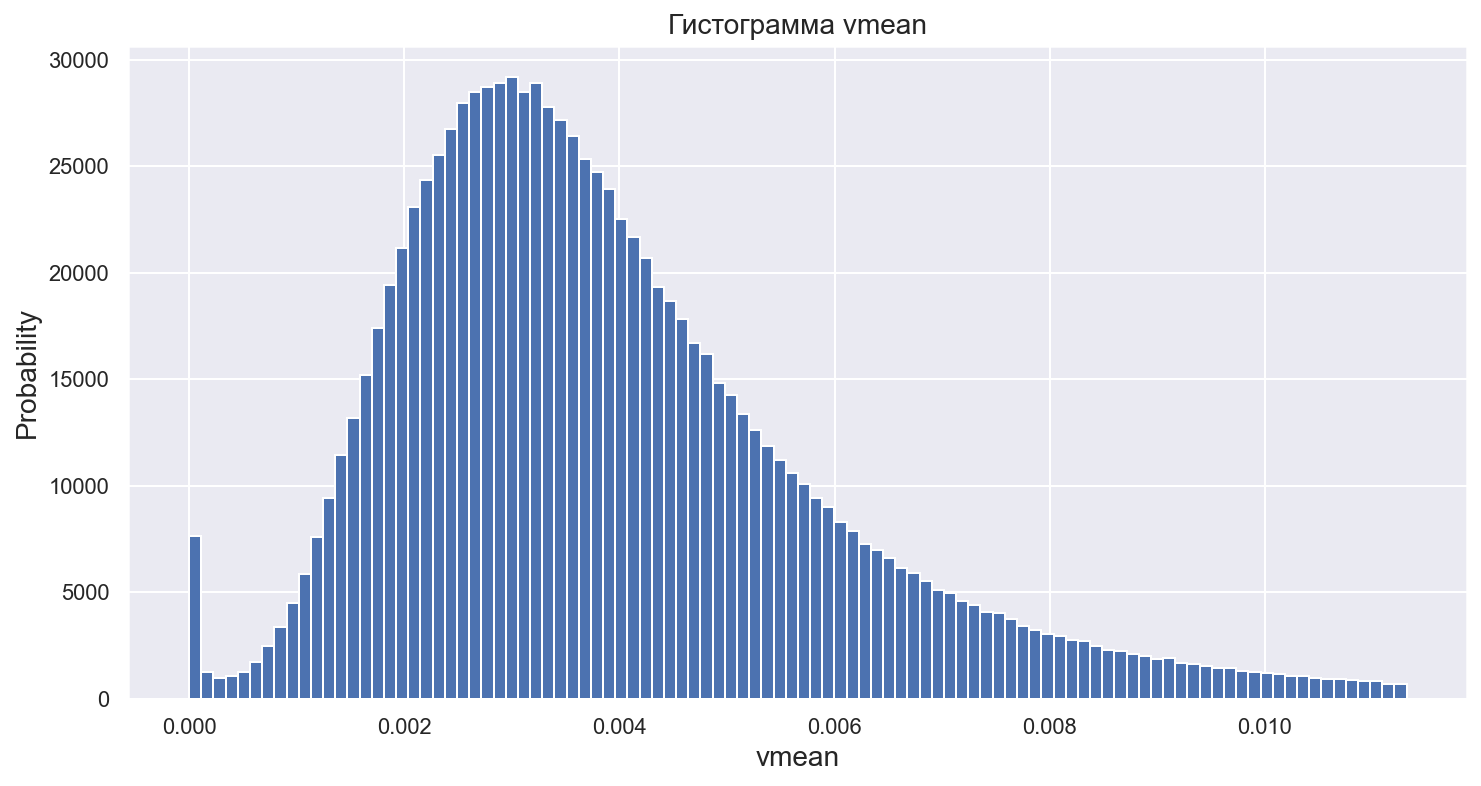

In [ ]:
X_train[X_train['vmean'] <= X_train['vmean'].quantile(0.99)].hist(column='vmean', figsize=(12, 6), bins=100)
plt.xlabel('vmean', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Гистограмма vmean', fontsize=14)
plt.show()

отметим, что такие маленькие значения связаны с тем, что так как изначально trip_duration это длительность поездки в секундах, то у нас по сути для скорости получаются единицы измерения в км/с (я ничего отдельно не преобразовал, поскольку это не было явно указано в задании), то есть, чтобы получить км/ч нужно умножить значения на 3600, кроме того, в нью-йорке максимальная скорость на улицах ограничена, судя по данным из интернета, до 40 км/ч

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

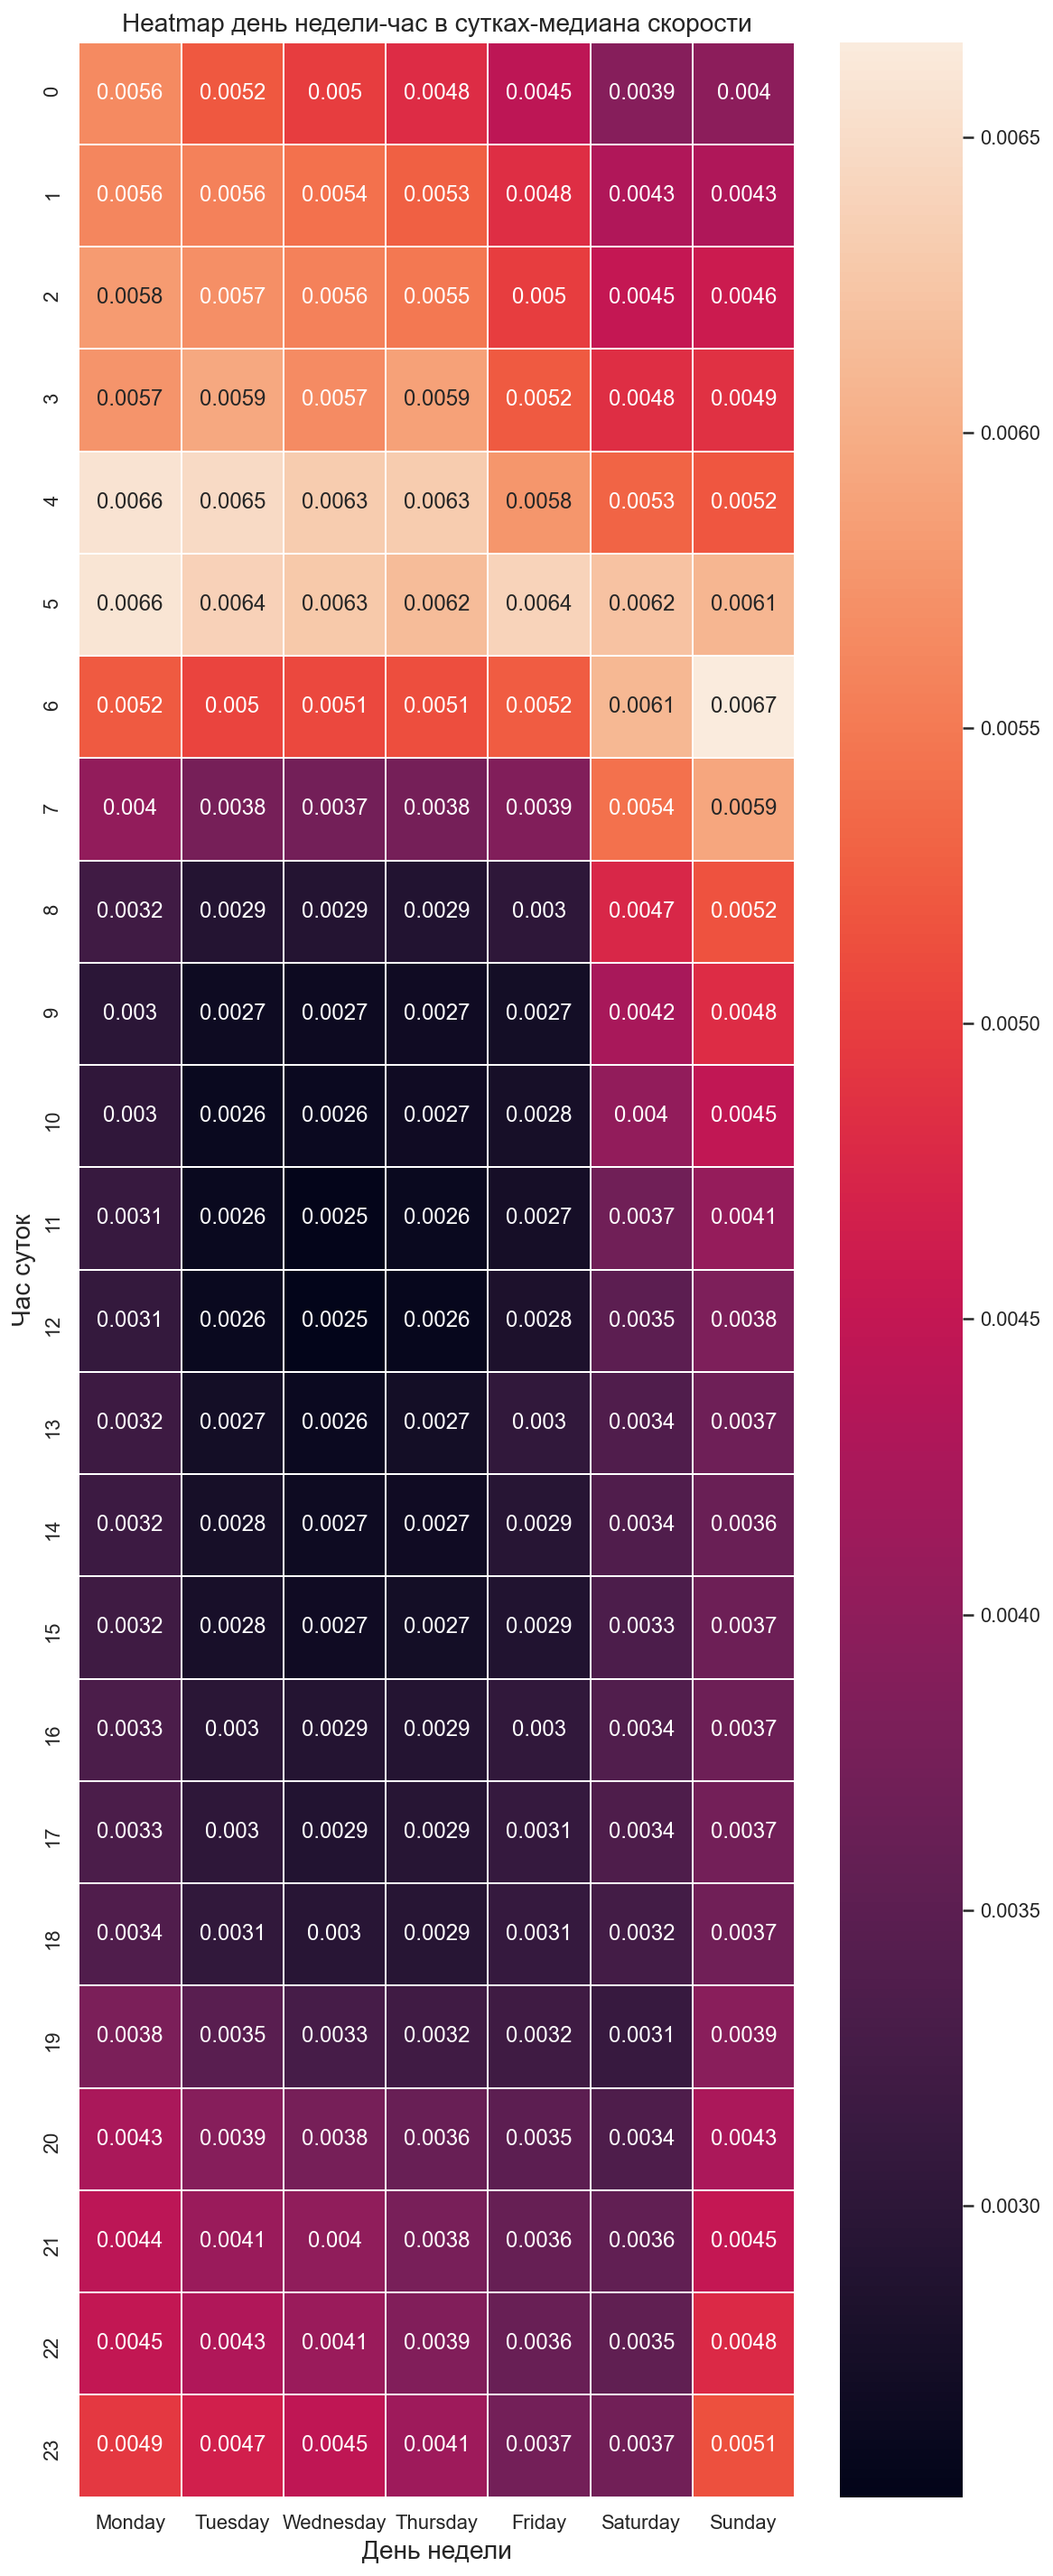

In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(9, 25))
kek = X_train.groupby(['weekday', 'hour']).median()[['vmean']].reset_index().pivot(index='hour', columns='weekday', values='vmean')
kek = kek[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
ax = sns.heatmap(data=kek, annot=True, linewidths=0.9, square=True)
ax.set_ylabel('Час суток', fontsize=14)
ax.set_xlabel('День недели', fontsize=14)
ax.set_title('Heatmap день недели-час в сутках-медиана скорости', fontsize=14)
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ:** потому что этой информации не должно быть в тестовой выборке (скорость вычисляется на основе целевой переменной)

In [ ]:
X_train.drop(columns=['vmean'], inplace=True, errors='ignore')

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должны зависеть от скорости!):

**Ответ:** минимальна в 12 часов дня в среду (0.0025), максимальна в понедельник в 4 утра,воскресенье 6 утра (0.0066)

Как я понимаю, здесь дана некоторая свобода в выборе того, что считать  "периодом пробок" и "периодом свободных дорог", и опираться предлагается на только что отрисованный heatmap, поэтому периодом пробок буду считать, что период пробок в понедельник-пятницу: 7-22; в субботу: 9-23; в воскресенье: 11-19

In [ ]:
df['is_trafic'] = 0
df.loc[(((df['weekday'].
         isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &
        ((7 <= df['hour']) & (df['hour'] <= 22))) | ((df['weekday'] == 'Saturday') &
                                    ((9 <= df['hour']) & (df['hour'] <= 23))) |
       ((df['weekday'] == 'Sunday') & ((11 <= df['hour']) & (df['hour'] <= 19)))),
       'is_trafic'] = 1
df['is_free'] = 1 - df['is_trafic']
df.head(10)

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   
5  id0801584          2 2016-01-30 22:01:40                6   
6  id1813257          1 2016-06-17 22:34:59                4   
7  id1324603          2 2016-05-21 07:54:58                1   
8  id1301050          1 2016-05-27 23:12:23                1   
9  id0012891          2 2016-03-10 21:45:01                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   
5        -73.982857        40.742195         -73.992081         40.749184   
6        -73.969017        40.757839         -73.957405         40.765896   
7        -73.969276        40.797779         -73.922470         40.760559   
8        -73.999481        40.738400         -73.985786         40.732815   
9        -73.981049        40.744339         -73.973000         40.789989   

  store_and_fwd_flag  log_trip_duration  ... hour    weekday    month  \
0                  N           6.122493  ...   17     Monday    March   
1                  N           6.498282  ...    0     Sunday     June   
2                  N           7.661527  ...   11    Tuesday  January   
3                  N           6.063785  ...   19  Wednesday    April   
4                  N           6.077642  ...   13   Saturday    March   
5                  N           6.095825  ...   22   Saturday  January   
6                  N           5.834811  ...   22     Friday     June   
7                  N           7.347300  ...    7   Saturday      May   
8                  N           5.545177  ...   23     Friday      May   
9                  N           7.111512  ...   21   Thursday    March   

  anom_jan  anom_may  daynumber  haversine  log_haversine  is_trafic  is_free  
0        0         0         74   1.498521       0.915699          1        0  
1        0         0        164   1.805507       1.031584          0        1  
2        0         0         19   6.385098       1.999464          1        0  
3        0         0         97   1.485498       0.910473          1        0  
4        0         0         86   1.188588       0.783257          1        0  
5        0         0         30   1.098942       0.741434          1        0  
6        0         0        169   1.326279       0.844270          1        0  
7        0         0        142   5.714981       1.904341          0        1  
8        0         0        148   1.310353       0.837400          0        1  
9        0         0         70   5.121162       1.811752          1        0  

[10 rows x 21 columns]

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [ ]:
df['is_kennedy_start'] = 0
df['is_kennedy_end'] = 0
df['is_eliz_start'] = 0
df['is_eliz_end'] = 0

df.loc[((round(df['pickup_latitude'], 3) == 40.644) & (round(df['pickup_longitude'], 3) == -73.782)), 'is_kennedy_start'] = 1
df.loc[((round(df['dropoff_latitude'], 3) == 40.644) & (round(df['dropoff_longitude'], 3) == -73.782)), 'is_kennedy_end'] = 1
df.loc[((round(df['pickup_latitude'], 3) == 40.691) & (round(df['pickup_longitude'], 3) == -74.177)), 'is_eliz_start'] = 1
df.loc[((round(df['dropoff_latitude'], 3) == 40.691) & (round(df['dropoff_longitude'], 3) == -74.177)), 'is_eliz_end'] = 1

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

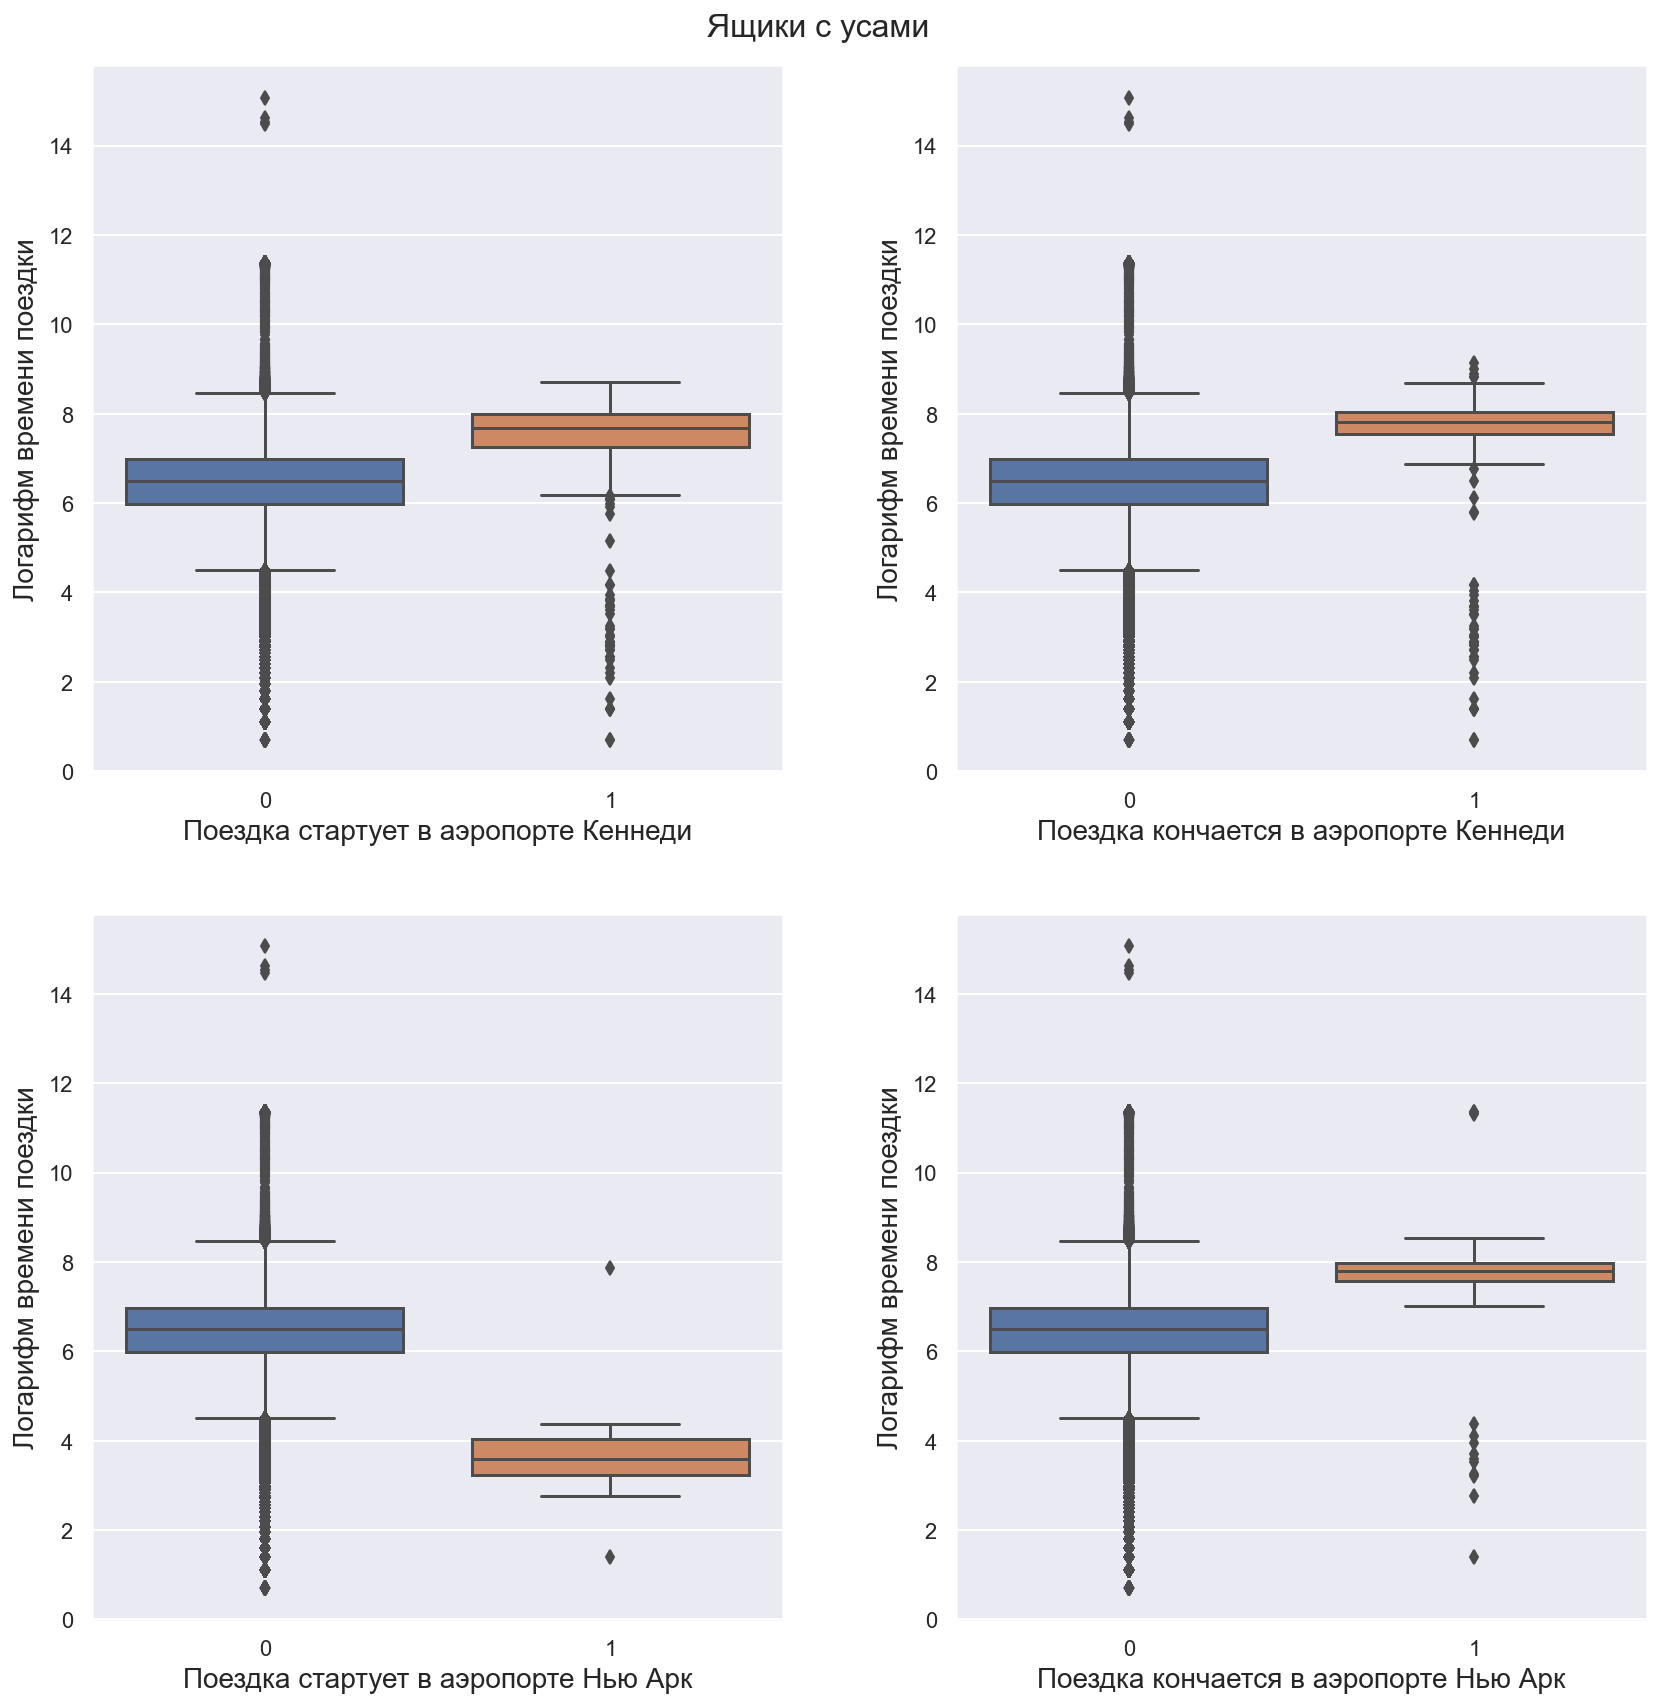

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.boxplot(x='is_kennedy_start', y='log_trip_duration',data=df, ax=axs[0, 0])
axs[0, 0].set_ylabel('Логарифм времени поездки', fontsize=14)
axs[0, 0].set_xlabel('Поездка стартует в аэропорте Кеннеди', fontsize=14)

sns.boxplot(x='is_kennedy_end', y='log_trip_duration', data=df, ax=axs[0, 1])
axs[0, 1].set_ylabel('Логарифм времени поездки', fontsize=14)
axs[0, 1].set_xlabel('Поездка кончается в аэропорте Кеннеди', fontsize=14)

sns.boxplot(x='is_eliz_start', y='log_trip_duration', data=df, ax=axs[1, 0])
axs[1, 0].set_ylabel('Логарифм времени поездки', fontsize=14)
axs[1, 0].set_xlabel('Поездка стартует в аэропорте Нью Арк', fontsize=14)

sns.boxplot(x='is_eliz_end', y='log_trip_duration', data=df, ax=axs[1, 1])
axs[1, 1].set_ylabel('Логарифм времени поездки', fontsize=14)
axs[1, 1].set_xlabel('Поездка кончается в аэропорте Нью Арк', fontsize=14)

plt.suptitle('Ящики с усами', fontsize=16)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.95,
                    hspace=0.2, wspace=0.25)

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ:** судя по количеству выбросов на графиках, возможно, что не очень хорошими.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.spatial.distance import cdist

COL_NAMES = dict(
    pick_lat="pickup_latitude",
    pick_lon="pickup_longitude",
    drop_lat="dropoff_latitude",
    drop_lon="dropoff_longitude"
)

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, loc, col, row, col_names=COL_NAMES):
        self.location_mh = loc
        self.col = col
        self.row = row
        self.col_names = col_names
        self.pick_lat = col_names["pick_lat"]
        self.pick_lon = col_names["pick_lon"]
        self.drop_lat = col_names["drop_lat"]
        self.drop_lon = col_names["drop_lon"]
        self.lat_min, self.lat_max = loc[:, 0].min(), loc[:, 0].max()
        self.lon_min, self.lon_max = loc[:, 1].min(), loc[:, 1].max()

    def create_box_(self, loc):
        polygon_loc = [
                    [(loc[0] - self.walls[0] / 2), loc[1] - self.walls[1] / 2],
                    [loc[0] + self.walls[0] / 2, loc[1] - self.walls[1] / 2],
                    [loc[0] + self.walls[0] / 2, loc[1] + self.walls[1] / 2],
                    [loc[0] - self.walls[0] / 2, loc[1] + self.walls[1] / 2]
                  ]
        return polygon_loc

    def show_map(self):
        self.walls, self.circles_loc = self._fit()
        _map = Map(center=((self.location_mh[:, 0]).mean(), (self.location_mh[:, 1]).mean()),
                   zoom=11, basemap=basemaps.Esri.NatGeoWorldMap)

        circles = [(CircleMarker(location=(lat, long), fill_color='red',
                                 fill_opacity=1, radius=5, stroke=False)) for lat, long in self.circles_loc]
        polygons = [(Polygon(locations=self.create_box_(loc), fill_opacity=0)) for loc in self.circles_loc]

        circles_layer = LayerGroup(layers=circles)
        polygon_layer = LayerGroup(layers=polygons)

        _map.add_layer(circles_layer)
        _map.add_layer(polygon_layer)

        return _map

    def _fit(self):
        self.walls = [(self.location_mh[:, 0].max() - self.location_mh[:, 0].min()) / self.col, \
              (self.location_mh[:, 1].max() - self.location_mh[:, 1].min()) / self.row]

        self.circles_loc = np.array([(((self.location_mh[:, 0].min() + i * (self.walls[0] / 2))), \
                               (self.location_mh[:, 1].min() + j * (self.walls[1] / 2)) ) \
                            for i in range(1, (self.col) * 2, 2) for j in range(1, (self.row) * 2, 2)])

        return self.walls, self.circles_loc

    def get_sector_idx(self, X):
        pickup_idx = cdist(X.loc[:, [self.pick_lat, self.pick_lon]],
                           a.circles_loc).argmin(axis=1)
        dropoff_idx = cdist(X.loc[:, [self.drop_lat, self.drop_lon]],
                            a.circles_loc).argmin(axis=1)
        qry = f"@self.lat_min <= {self.pick_lat} <= @self.lat_max \
               and @self.lon_min <= {self.pick_lon} <= @self.lon_max"
        pickup_valid = X.eval(qry).to_numpy()
        pickup_idx[~pickup_valid] = -1
        qry = f"@self.lat_min <= {self.drop_lat} <= @self.lat_max \
               and @self.lon_min <= {self.drop_lon} <= @self.lon_max"
        dropoff_valid = X.eval(qry).to_numpy()
        dropoff_idx[~dropoff_valid] = -1
        return pickup_idx, dropoff_idx

    def transform(self, X):
        X1 = X.copy()
        X1['pickup_idx'], X1['dropoff_idx'] = self.get_sector_idx(X)
        return X1 #+ self.get_sector_idx(X)

Мы нигде не обсуждали создание кастомных трансформеров, и я не нашел хороших туториалов, как это правильно делать,и что происходит внутри (только базовые вещи, например, банальные примеры с transform, fit (вроде такого: https://konstantinklepikov.github.io/2019/08/02/sklearn-transformators.html). Ранее опыта создания трансформеров не имел, код взял отсюда:
https://ru.stackoverflow.com/questions/1161594/Разбиение-области-на-ячейки-и-присвоение-меток-с-началом-и-концом

In [ ]:
y = df['log_trip_duration']
X = df.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
mh = np.array([
              [40.703314, -74.018608],
              [40.703314, -73.934241],
              [40.791438, -73.934241],
              [40.791438, -74.018608]
               ])
a = MapGridTransformer(mh, 5, 4)
X_train_transf = a._fit()
X_train_transf = a.transform(X_train)
X_test_transf = a.transform(X_test)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [ ]:
categorical = ['weekday', 'month', 'anom_jan', 'anom_may', 'is_trafic', 'is_free',
       'is_kennedy_start', 'is_kennedy_end', 'is_eliz_start', 'is_eliz_end', 'pickup_idx', 'dropoff_idx']
numeric_features = ['hour', 'daynumber', 'log_haversine']

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_transf, y_train)
y_pred = model.predict(X_test_transf)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4885


Делал Ridge регрессию и без признаков pickup_idx, dropoff_idx для номеров ячейки поездки, для них test RMSE было выше, поэтому эти признаки оставлю, кроме того, не сказано их выбросить.

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

**Ответ:** passenger_count это число пассажиров, которое по логике должно быть полезным, поскольку логично, что с ростом числа пассажиров поездка должна длиться дольше, так как нужно довести каждого до нужной ему точки. vendor_id и store_and_fwd_flag это, соответсвенно, код провайдера, от которого пришла информация о поездке, и флаг, который показывает, хранилась ли информация на таксометре из-за отсутствия связи во время поездки. Не могу предположить, по какой причине такая информация может быть полезной

In [ ]:
feat_l = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']
for x in feat_l:
    print('Число уникальных значений признака ', x, ':', df[x].nunique())

Число уникальных значений признака  vendor_id : 2
Число уникальных значений признака  passenger_count : 10
Число уникальных значений признака  store_and_fwd_flag : 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

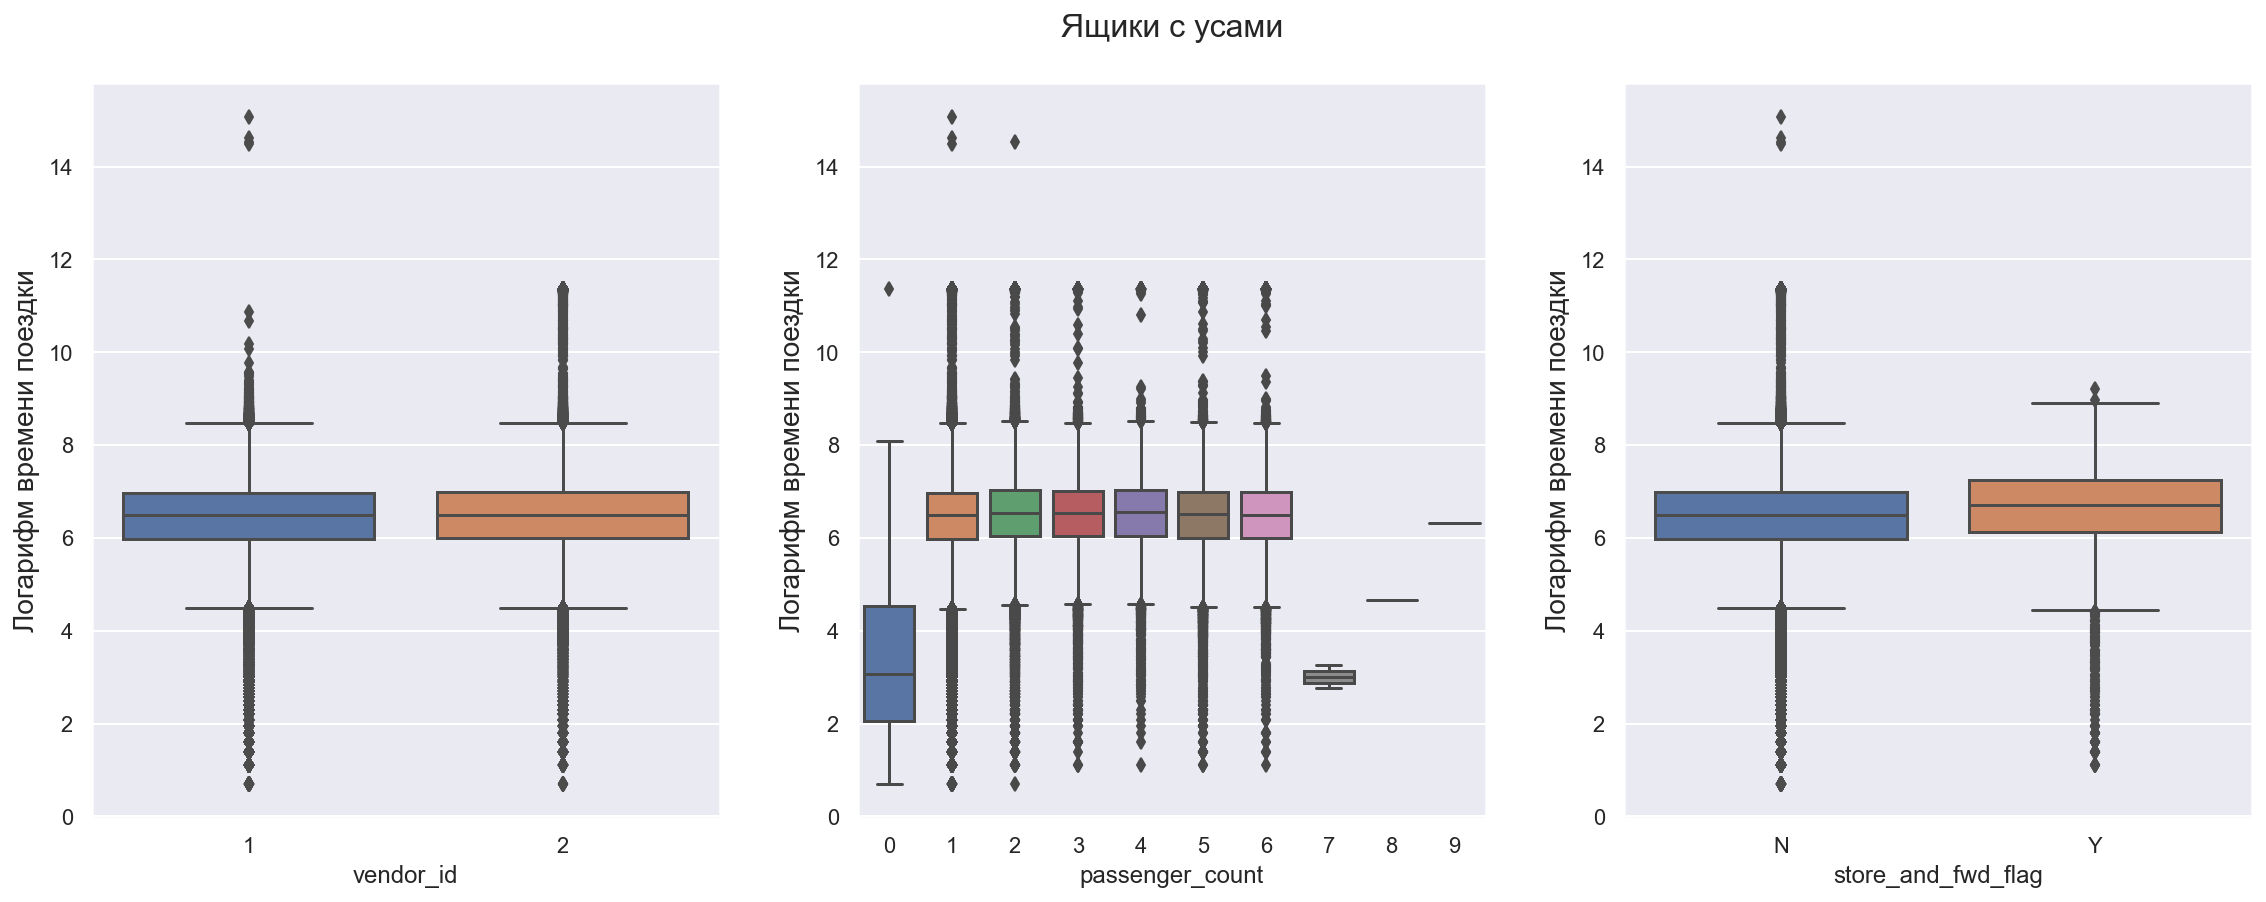

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

for i in range(3):
    sns.boxplot(x=feat_l[i], y='log_trip_duration', data=df, ax=axs[i])
    axs[i].set_ylabel('Логарифм времени поездки', fontsize=14)


plt.suptitle('Ящики с усами', fontsize=16)
fig.subplots_adjust(left=0, right=1, bottom=0.05, top=0.9,
                    hspace=0.2, wspace=0.22)

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
df['vendor_id'] = df['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
df.head(5)

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          1 2016-03-14 17:24:55                1   
1  id2377394          0 2016-06-12 00:43:35                1   
2  id3858529          1 2016-01-19 11:35:24                1   
3  id3504673          1 2016-04-06 19:32:31                1   
4  id2181028          1 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

   store_and_fwd_flag  log_trip_duration  ... anom_may  daynumber haversine  \
0                   0           6.122493  ...        0         74  1.498521   
1                   0           6.498282  ...        0        164  1.805507   
2                   0           7.661527  ...        0         19  6.385098   
3                   0           6.063785  ...        0         97  1.485498   
4                   0           6.077642  ...        0         86  1.188588   

  log_haversine  is_trafic  is_free  is_kennedy_start  is_kennedy_end  \
0      0.915699          1        0                 0               0   
1      1.031584          0        1                 0               0   
2      1.999464          1        0                 0               0   
3      0.910473          1        0                 0               0   
4      0.783257          1        0                 0               0   

   is_eliz_start  is_eliz_end  
0              0            0  
1              0            0  
2              0            0  
3              0            0  
4              0            0  

[5 rows x 25 columns]

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ:** ящики для разных значений признаков vendor_id и store_and_fwd_flag довольно похожи, как и для значений 1-6 признака passenger_count, поэтому возможно, что признаки будут не такими сильными, как можно было ожидать

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [ ]:
categorical = ['weekday', 'month', 'anom_jan', 'anom_may', 'is_trafic', 'is_free',
       'is_kennedy_start', 'is_kennedy_end', 'is_eliz_start', 'is_eliz_end', 'pickup_idx',
               'dropoff_idx', 'vendor_id', 'store_and_fwd_flag']
numeric_features2=['hour', 'daynumber', 'log_haversine', 'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features2)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_transf, y_train)
y_pred = model.predict(X_test_transf)
y_train_pred = model.predict(X_train_transf)


print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

residuals = y_train - y_train_pred

Train RMSE = 0.4897
Test RMSE = 0.4883


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [ ]:
df.drop(columns=['vendor_id', 'passenger_count', 'store_and_fwd_flag'], errors='ignore', inplace=True)
X_train_transf.drop(columns=['vendor_id', 'passenger_count', 'store_and_fwd_flag'], errors='ignore', inplace=True)
X_test_transf.drop(columns=['vendor_id', 'passenger_count', 'store_and_fwd_flag'], errors='ignore', inplace=True)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

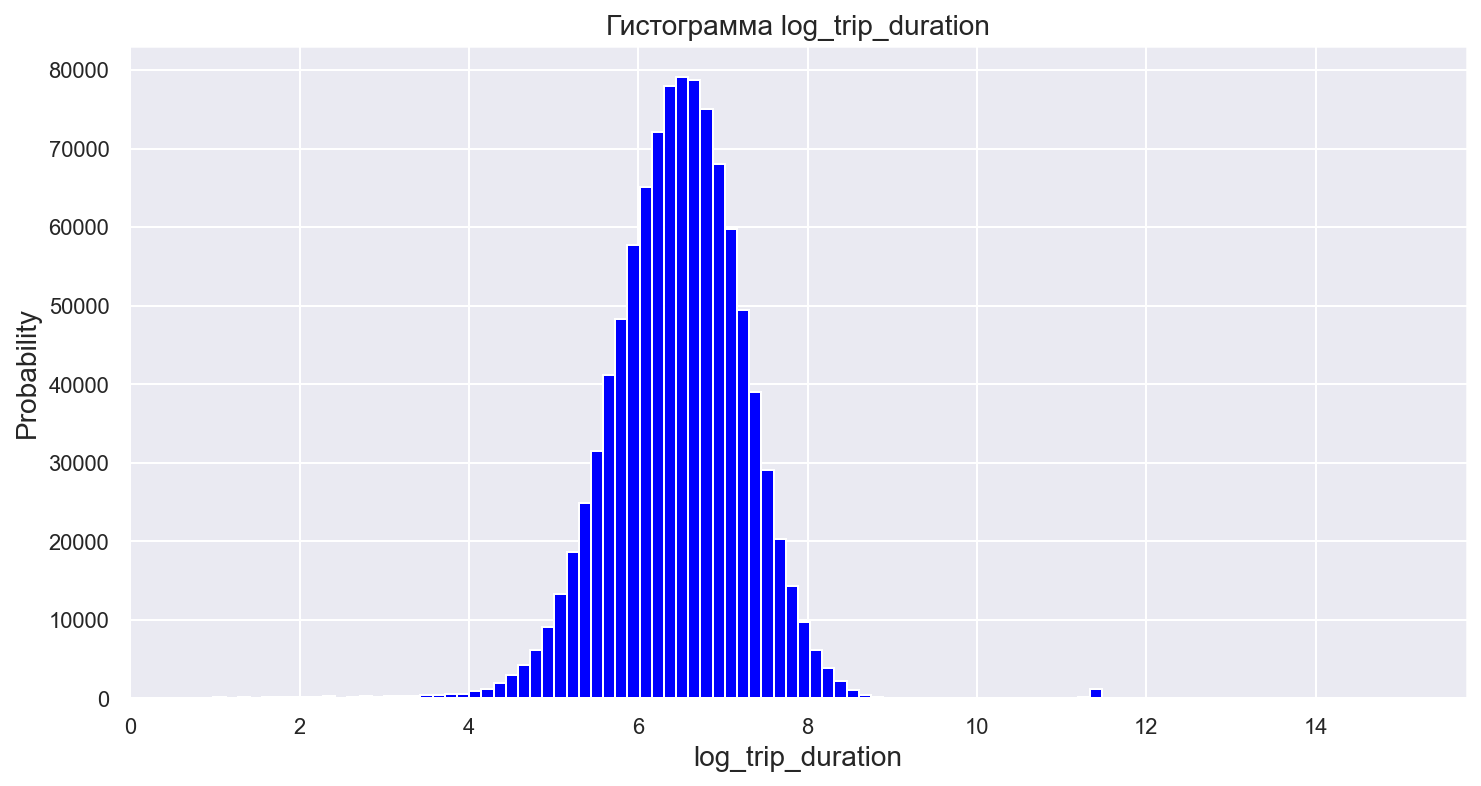

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(y_train, 100, color ='blue')
plt.xlabel('log_trip_duration', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Гистограмма log_trip_duration', fontsize=14)
plt.show()

Полагаю, к выбросам можно отнести объекты с логарифмом времени поездки меньше либо равным 2

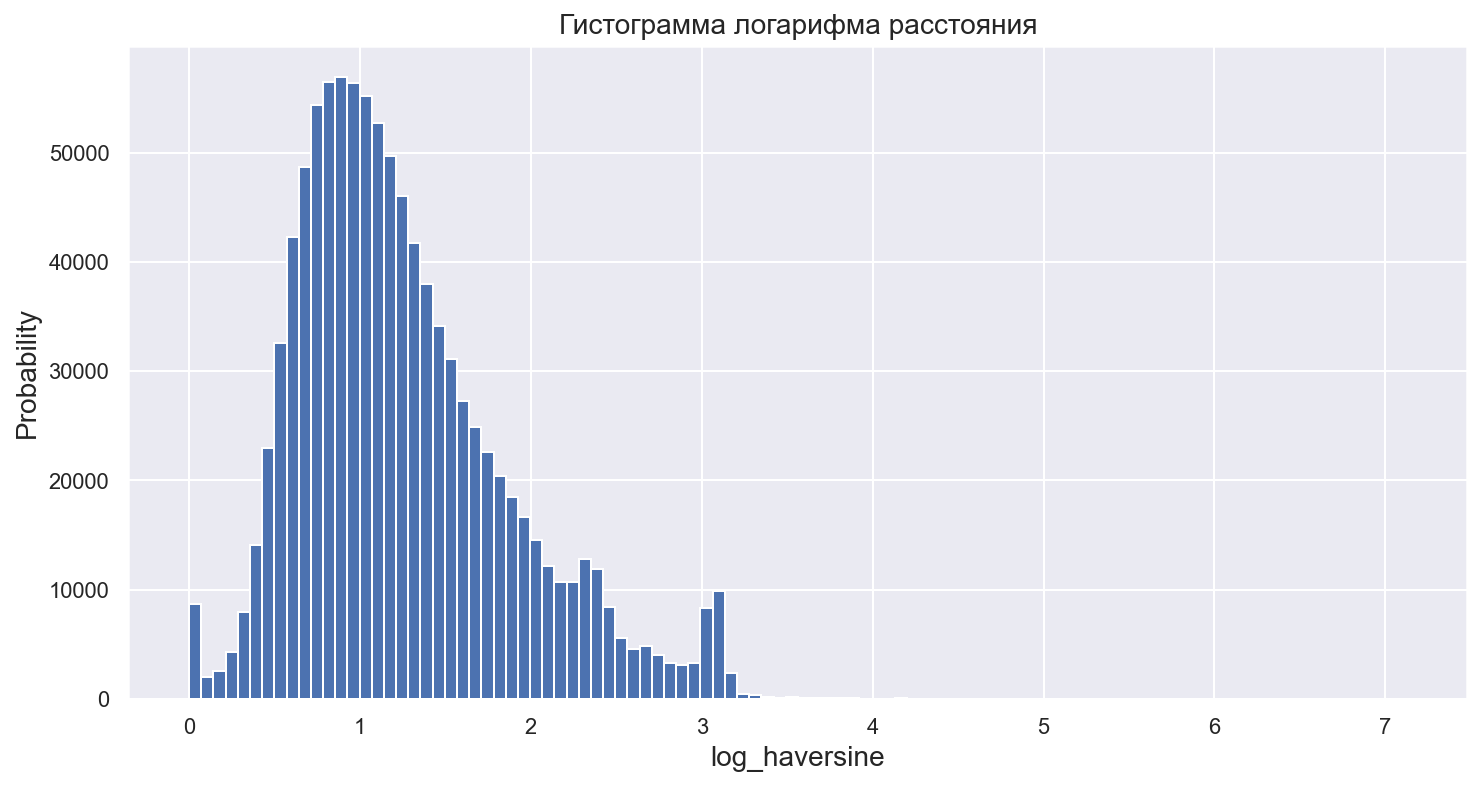

In [ ]:
X_train_transf.hist(column='log_haversine', figsize=(12, 6), bins=100)
plt.xlabel('log_haversine', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Гистограмма логарифма расстояния', fontsize=14)
plt.show()

К выбросам можно отнести объекты с логарифмом расстояния больше либо равным 3,5

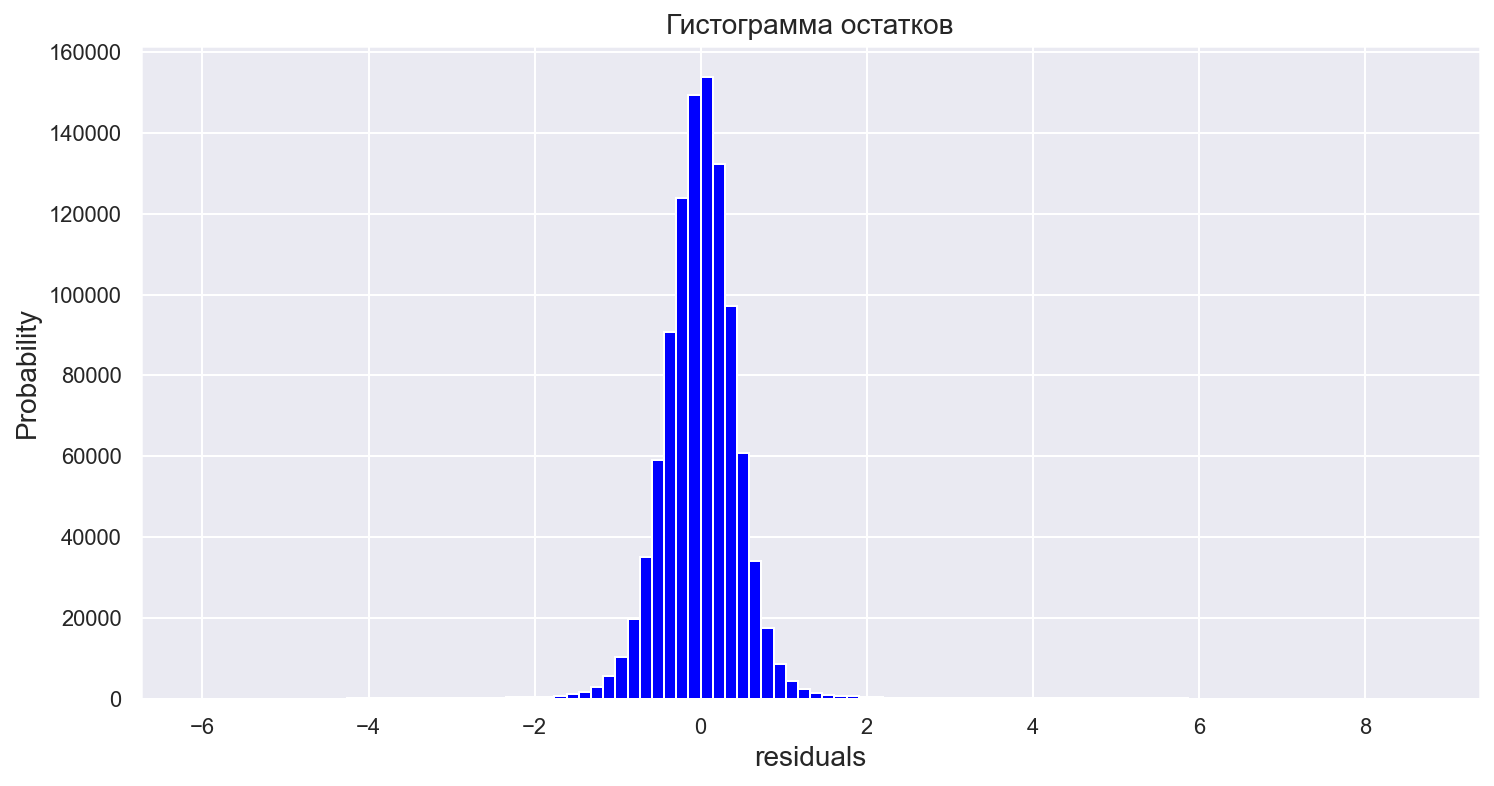

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(residuals, 100, color ='blue')
plt.xlabel('residuals', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Гистограмма остатков', fontsize=14)
plt.show()

In [ ]:
small_trip_dur_ind = y_train[y_train <= 2].index # удалим объекты с маленьким временем поездки
df.drop(small_trip_dur_ind, inplace=True)
X_train_transf.drop(small_trip_dur_ind, inplace=True)
y_train.drop(small_trip_dur_ind, inplace=True)

In [ ]:
huge_dist = X_train_transf[X_train_transf['log_haversine'] >= 3.5].index # удалим объекты с очень большим пройденным расстоянием
df.drop(huge_dist, inplace=True)
X_train_transf.drop(huge_dist, inplace=True)
y_train.drop(huge_dist, inplace=True)

In [ ]:
huge_resid = residuals[(residuals >= 2) & (residuals <= -2)].index # удалим объекты с очень большими остатками регрессии
df.drop(huge_resid, inplace=True)
X_train_transf.drop(huge_resid, inplace=True)
y_train.drop(huge_resid, inplace=True)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [ ]:
categor_for_cycle = ['weekday', 'month', 'pickup_idx', 'dropoff_idx']

for c in categor_for_cycle:
    for x in X_train_transf[c].unique():
        if X_train_transf[c].value_counts()[x] <= X_train_transf[c].shape[0] * 0.01:
            print('Rare category in feature', c, ':', x)

Rare category in feature pickup_idx : 11
Rare category in feature pickup_idx : 2
Rare category in feature pickup_idx : 6
Rare category in feature pickup_idx : 12
Rare category in feature pickup_idx : 3
Rare category in feature pickup_idx : 7
Rare category in feature pickup_idx : 16
Rare category in feature dropoff_idx : 2
Rare category in feature dropoff_idx : 6
Rare category in feature dropoff_idx : 3
Rare category in feature dropoff_idx : 12
Rare category in feature dropoff_idx : 7
Rare category in feature dropoff_idx : 11
Rare category in feature dropoff_idx : 16


In [ ]:
X_train_transf.loc[X_train_transf['pickup_idx'].isin([2, 3, 6, 7, 11, 12, 16]), 'pickup_idx'] = 2
X_train_transf.loc[X_train_transf['dropoff_idx'].isin([2, 3, 6, 7, 11, 12, 16]), 'dropoff_idx'] = 2
X_test_transf.loc[X_test_transf['pickup_idx'].isin([2, 3, 6, 7, 11, 12, 16]), 'pickup_idx'] = 2
X_test_transf.loc[X_test_transf['dropoff_idx'].isin([2, 3, 6, 7, 11, 12, 16]), 'dropoff_idx'] = 2

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [ ]:
categorical = ['weekday', 'month', 'anom_jan', 'anom_may', 'is_trafic', 'is_free',
       'is_kennedy_start', 'is_kennedy_end', 'is_eliz_start', 'is_eliz_end', 'pickup_idx',
               'dropoff_idx']
numeric_features = ['hour', 'daynumber', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_transf, y_train)
y_pred = model.predict(X_test_transf)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4888


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте количество признаков до и после кодирования категориальных признаков.

In [ ]:
print("Количество признаков до кодирования OneHot:", X_train_transf.shape[1])
print("Количество признаков после кодирования OneHot:", column_transformer.transform(X_train_transf).shape[1])

Количество признаков до кодирования OneHot: 23
Количество признаков после кодирования OneHot: 62


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
from sklearn.linear_model import Lasso

categorical = ['weekday', 'month', 'anom_jan', 'anom_may', 'is_trafic', 'is_free',
       'is_kennedy_start', 'is_kennedy_end', 'is_eliz_start', 'is_eliz_end', 'pickup_idx',
               'dropoff_idx']
numeric_features = ['hour', 'daynumber', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train_transf, y_train)
y_pred = model.predict(X_test_transf)
print("RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

RMSE = 0.7943


RMSE для lasso больше

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train_transf, y_train, test_size=0.2, random_state=10)

Best alpha = 0.0207


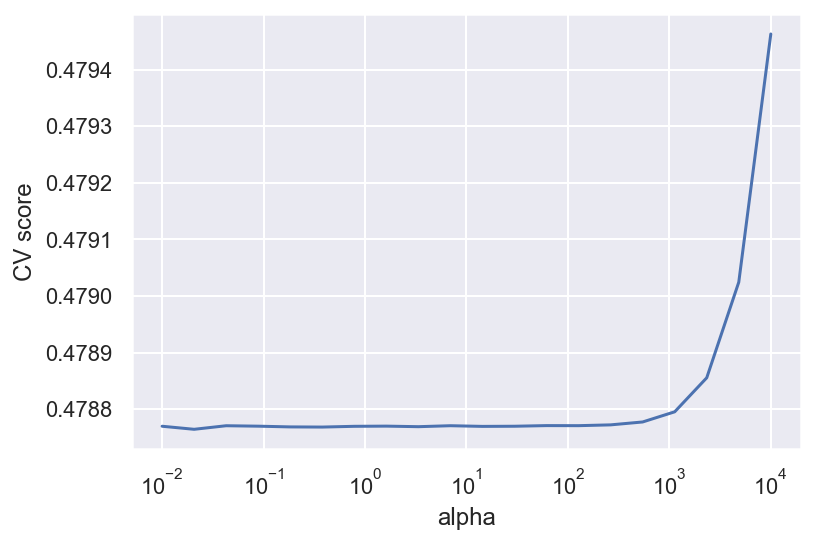

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

split_index = [-1 if x in X_train_new.index else 0 for x in X_train_transf.index]
pds = PredefinedSplit(test_fold=split_index)

alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=pds, n_jobs=-1)
searcher.fit(X_train_transf, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
plt.show()

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_train_transf, y_train)
y_pred = model.predict(X_test_transf)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4888


Best alpha = 0.0001


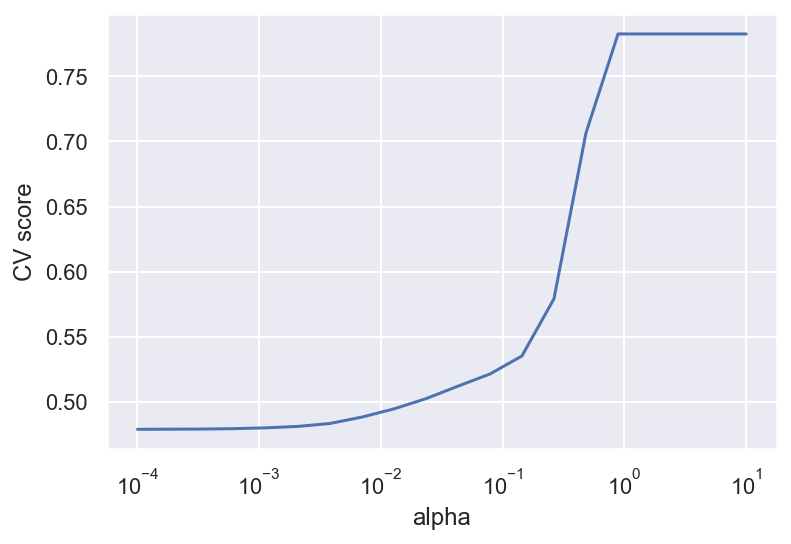

In [ ]:
split_index = [-1 if x in X_train_new.index else 0 for x in X_train_transf.index]
pds = PredefinedSplit(test_fold=split_index)

alphas = np.logspace(-4, 1, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=pds, n_jobs=-1)
searcher.fit(X_train_transf, y_train)

best_alpha1 = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha1)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
plt.show()

пытался сделать и logspace,начиная с меньшей стартовой точки, например, np.logspace(-6,1,20),т.к. в качестве лучшего значения он выдает наименьший альфа (что логично, если смотреть на график), но за полчаса программа так и не отработала, не знаю, в чем проблема, возможно, компьютер не слишком мощный

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha1))
])

model = pipeline.fit(X_train_transf, y_train)
y_pred = model.predict(X_test_transf)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4888


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
for a in alphas:
    column_transformer = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
        ('scaling', StandardScaler(), numeric_features)
    ])

    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(a))
    ])

    model = pipeline.fit(X_train_transf, y_train)
    y_pred = model.predict(X_test_transf)
    print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
    lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
    print('alpha=', a, ". Zero weights in Lasso:", lasso_zeros)
    print()

Test RMSE = 0.4888
alpha= 0.0001 . Zero weights in Lasso: 62

Test RMSE = 0.4889
alpha= 0.00018329807108324357 . Zero weights in Lasso: 62

Test RMSE = 0.4890
alpha= 0.0003359818286283781 . Zero weights in Lasso: 62

Test RMSE = 0.4894
alpha= 0.0006158482110660267 . Zero weights in Lasso: 62

Test RMSE = 0.4900
alpha= 0.0011288378916846883 . Zero weights in Lasso: 62

Test RMSE = 0.4912
alpha= 0.00206913808111479 . Zero weights in Lasso: 62

Test RMSE = 0.4935
alpha= 0.00379269019073225 . Zero weights in Lasso: 62

Test RMSE = 0.4984
alpha= 0.0069519279617756054 . Zero weights in Lasso: 62

Test RMSE = 0.5048
alpha= 0.012742749857031334 . Zero weights in Lasso: 62

Test RMSE = 0.5130
alpha= 0.023357214690901212 . Zero weights in Lasso: 62

Test RMSE = 0.5225
alpha= 0.04281332398719392 . Zero weights in Lasso: 62

Test RMSE = 0.5320
alpha= 0.07847599703514607 . Zero weights in Lasso: 62

Test RMSE = 0.5461
alpha= 0.14384498882876628 . Zero weights in Lasso: 62

Test RMSE = 0.5904
alpha=

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ:**

In [ ]:
top_arr = X_train_transf.groupby(['pickup_idx', 'dropoff_idx'])[['id']].count().sort_values(by='id',
                       ascending=False)[:100].reset_index()[['pickup_idx', 'dropoff_idx']].values

def f(arg1, arg2):
    if [arg1,arg2] in top_arr.tolist():
        return top_arr.tolist().index([arg1,arg2])
    else:
        return -1

X_train_transf['feat_inter'] = X_train_transf[['pickup_idx', 'dropoff_idx']].apply(lambda x: f(*x), axis=1)
X_test_transf['feat_inter'] = X_test_transf[['pickup_idx', 'dropoff_idx']].apply(lambda x: f(*x), axis=1)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых данных и посчитайте качество на тестовой выборке

In [ ]:
categorical = ['weekday', 'month', 'anom_jan', 'anom_may', 'is_trafic', 'is_free',
       'is_kennedy_start', 'is_kennedy_end', 'is_eliz_start', 'is_eliz_end', 'pickup_idx',
               'dropoff_idx', 'feat_inter']
numeric_features = ['hour', 'daynumber', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_train_transf, y_train)
y_pred = model.predict(X_test_transf)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4779


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

**Ответ:**

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ